# 분석  목적

 - 현장 이슈 : 콘택트렌즈의 도수에 영향을 주는 요인이 다양하고 작업자의 숙련도에 따라 금형조합별 도수 적중률이 크게 변화하는 문제가 있다
 
 - 목적 : 콘텐츠렌즈의 도수와 금형조합 간의 상관관계를 분석을 통해 콘택트렌즈의 도수를 예측하고 최적화 알고리즘을 이용해 최적의 금형조합을 구한다
 
 => 작업자의 기술 수준이 콘택트렌즈의 도수를 결정하는 금형의 선택과 연관되어 있다
 
 => 즉, 같은 금형이라도 작업자의 숙련도에 따라 도수의 적중률이 다르게 나타날 수 있다 
 
 => 이는 생산 일관성과 품질 관리에 영향을 미칠 수 있는 중요한 문제이다
 
 * 금형조합 : 제품의 형상, 크기, 속성 등을 결정하는데 사용되는 금형의 다양한 조합

# 분석 적용 알고리즘

- 연관 규칙 : 자료에 있는 항목들 간의 어떤 관계가 있는지 찾기 위한 알고리즘

    => 금형군(유사한 기능이나 형태를 가진 여러 금형들의 집합), 설비번호, 시퀀스, 목표도수를 기준으로 과거 생산이력에서 도수가 일치하는 데이터의 연관규칙을 분석하여 연관성이 가장 높은 금형조합을 탐색
    
- XGBoost : 의사결정나무 기반의 앙상블기법 중 하나

# 분석 개요

## 분석 배경

### 공정 개요

- 사출 성형 : 플라스틱 제품의 성형법 중 가장 보편적으로 쓰이는 방식, 열가소성 원료를 가열하여 매우 높은 소성 상태로 만들고 금형의 캐비티에 가압 주입 후 냉각시켜 성형품을 만드는 방법

- 사출성형 과정에서 온도, 시간, 위치, 속도 압력 등 공정 조건에 따라 성형품의 품질이 좌우될 수 있다

### 콘탠트렌즈 생산과정

- 몰드캐스팅 방식으로 생산하는 콘탠트렌즈 생산과정의 플라스틱 몰드의 사출공정에서의 최적 생산조건을 탐색하기 위한 분석을 수행

- 렌즈의 양면 형태를 가진 렌즈의 상형, 하형 몰드를 만들고, 원재료를 하형 몰드에 주입한 후 상형 몰드를 올려 렌즈를 성형하는 방법

<br>

- 몰드캐스팅 방식 : 플라스틱, 고무, 수지 등의 유동성을 가진 재료를 사용하여 부품이나 제품을 만드는 공정 방법 중 하나

### 공정상의 문제 현황, 해결 방안

작업자 숙련도에 따라 지시한 제품 규격과 생산된 제품의 규격 차이는 매우 크게 나타난다

=> 금형 조합 탐색 후 설비, 금형 위치를 고려하여 도수를 예측하고, 생산하고자 하는 목표 도수와 비교하여 차이가 작은 순으로 5개의 금형 조합을 추천한다

# 분석 목표

지시한 규격에 맞는 렌즈를 생산하기 위한 최적의 금형 조합의 추천을 목표로 한다

step1 : EDA 및 도수 예측 모델 학습
    
    => 데이터 취득, 데이터 전처리, XGBoost 모델 학습

step2 : 최적 금형 조합 탐색

    => 조건 입력, 금형조합 탐색(연관규칙분석), 도수 예측(XGBoost), 금형조합추천

## 데이터 정의

- 분석에 활용한 원천 제조 데이터는 콘택트렌즈 생산에 필요한 플라스틱 몰드사출공정 관한 요인을 EPR과 MES DB에서 수집한 것으로 폼목, 설비정보, 금형정보, 제품정보, 도수, 샘플링 결과 등으로 이루어져 있다

<br>

- 데이터셋 주요 변수

- EQUIP_ID : 설비번호

- MFG_DT : 작업시간

- SALE_CD : 판매코드

- MOLD_POS : 금형 위치

- REAL_POWER : 도수 

- CP : 난시 강도

- AX : 난시 각도

- MOLD_IN_TOP : 상형몰드 생산을 위한 바깥쪽 금형

- MOLD_IN_BOT : 상형몰드 생산을 위한 안쪽 금형

- MOLD_OUT_TOP : 하형몰드 생산을 위한 안쪽 금형

- MOLD_OUT_BOT : 하형모들 생산을 위한 바깥쪽 금형

- IN_RADIUS : 내측 곡률

- OUT_RADIUS : 외측 곡률

- POWER : 결정 도수

- POWER1 : 첫 번째 도수 측정 결과

- POWER2 : 두 번째 도수 측정 결과

- POWER3 : 새 번째 도수 측정 결과

- POWER4 : 네 번째 도수 측정 결과

- POWER5 : 다섯 번째 도수 측정 결과

# 실습

## 라이브러리, 데이터 불러오기

In [22]:
# !pip install parse
# !pip install mlxtend --upgrade --no-deps
# !pip install pyswarm
# !pip install GPUtil

# ! pip install --upgrade matplotlib
# ! pip install --upgrade seaborn

In [1]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링 및 머신러닝
from sklearn.ensemble import IsolationForest # 이상치 탐지를 위한 앙상블 기반의 머신러닝 모델
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import fpgrowth # 데이터에서 빈발 패턴을 발견하는 FP-Growth 알고리즘
from xgboost import XGBRegressor
from xgboost import plot_importance

# 경고 제어
import warnings
warnings.filterwarnings('ignore')

# 기타
import argparse # 명령행 인터페이스를 파싱하기 위한 라이브러리
from parse import compile # 문자열을 구문 분석하기 위한 라이브러리
from pathlib import Path
from datetime import date, datetime
from pyswarm import pso # 파이썬을 위한 파티클 스웜 최적화 알고리즘
import GPUtil  # GPU 사용량을 검색하는 데 사용되는 유틸리티 라이브러리

In [2]:
path = './data/raw_data.csv' # 해당 데이터 경로
df_raw = pd.read_csv(path)

print(df_raw.shape)
df_raw.head(3)

(175102, 19)


,EQUIP_ID,MFG_DT,SALE_CD,MOLD_POS,REAL_POWER,CP,AX,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP1,2021-03-23,SALES 0,8,0.0,NaN,NaN,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0075,CORE1 A 8A. D-00,-6.4889,6.5811,0.0,0.12,0.12,0.12,0.25,0.25
1,EQUIP2,2021-03-23,SALES 1,1,-6.5,NaN,NaN,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1050,CORE1 B 02. C-10,-6.3564,7.4551,-6.5,-6.25,-6.25,-6.37,-6.50,-6.50
2,EQUIP1,2021-03-25,SALES 2,2,0.0,NaN,NaN,CORE2 C 03. 0660,CORE2 C 03. P1+0,CORE2 C 04. M0000,CORE2 C 04. A-00,-7.3246,7.3802,0.0,0.12,0.12,0.25,0.25,0.25


## 데이터 탐색 및 정제

데이터 구성 확인

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175102 entries, 0 to 175101
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EQUIP_ID      175102 non-null  object 
 1   MFG_DT        175102 non-null  object 
 2   SALE_CD       175102 non-null  object 
 3   MOLD_POS      175102 non-null  int64  
 4   REAL_POWER    175089 non-null  float64
 5   CP            0 non-null       float64
 6   AX            0 non-null       float64
 7   MOLD_IN_TOP   175102 non-null  object 
 8   MOLD_IN_BOT   175102 non-null  object 
 9   MOLD_OUT_TOP  175102 non-null  object 
 10  MOLD_OUT_BOT  175102 non-null  object 
 11  IN_RADIUS     175102 non-null  float64
 12  OUT_RADIUS    175102 non-null  float64
 13  POWER         174522 non-null  float64
 14  POWER1        174572 non-null  float64
 15  POWER2        174570 non-null  float64
 16  POWER3        174565 non-null  float64
 17  POWER4        174562 non-null  float64
 18  POWE

=> 'CP', 'AX', 'POWER', 'POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5' 컬럼에 Null값이 있다

<br>

요약 통계량 확인

In [4]:
df_raw.describe()

,MOLD_POS,REAL_POWER,CP,AX,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
count,175102.000000,175089.000000,0.0,0.0,175102.000000,175102.000000,174522.000000,174572.000000,174570.000000,174565.000000,174562.000000,174551.000000
mean,4.667639,-3.351588,NaN,NaN,-1.405773,2.002773,-3.354983,-3.353921,-3.362280,-3.368980,-3.376297,-3.383163
std,2.550721,2.401494,NaN,NaN,6.718276,6.720985,2.442768,2.404919,2.402462,2.403499,2.405053,2.407265
min,1.000000,-12.000000,NaN,NaN,-11.019500,-9.244400,-175.000000,-74.500000,-74.500000,-74.500000,-74.500000,-74.500000
25%,3.000000,-5.000000,NaN,NaN,-6.494700,-6.372300,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
50%,5.000000,-3.250000,NaN,NaN,-6.365000,6.804900,-3.250000,-3.250000,-3.250000,-3.250000,-3.250000,-3.370000
75%,7.000000,-1.500000,NaN,NaN,6.946300,7.349775,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000
max,16.000000,6.000000,NaN,NaN,9.569400,10.687200,20.000000,6.500000,6.500000,6.500000,12.000000,25.000000


=> 'MOLD_POS' : 최대가 16이므로 16개의 서로 다른 금형 위치가 있다

=> 'REAL_POWER' : 데이터가 음수에 편향

=> 'CP', 'AX' : 결측치 값만 포함

=> 'IN_RADIUS', 'OUT_RADIUS' : 표준 편차 값이 크므로 데이터가 퍼져있다

=> 'POWER', 'POWER1' ~ 'POWER5' : 음수 범위에 있다

## 데이터 전처리

자주 사용하는 변수 정의

'MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT같은 금형값 컬럼이나 'IN_RADIUS', 'OUT_RADIUS'같은 곡률값 컬럼처럼 코드 내 반복하여 사용될 값을 변수로 지정

In [5]:
# 금형조합과 곡률
cores = ['MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT'] # 금형값
radius = ['IN_RADIUS', 'OUT_RADIUS'] # 곡륙 값
equip_info = ['EQUIP_ID', 'MOLD_POS'] # 설비 정보
powers = ['POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5'] # 도수 측정 결과

렌즈 분류 및 카테고리 열 추가

렌즈의 도수(REAL_POWER)를 기준으로 렌즈의 종류를 근시, 무도수(미용), 원시로 나눈다

- 근시(MYOPIA) : 도수가 0보다 작을 때

- 무도수(BEAUTY) : 도수가 0일 때

- 원시(HYPER) : 도수가 0보다 클 때

In [6]:
df_raw['CATEGORY'] = 'MYOPIA' # 근시
df_raw.loc[df_raw['REAL_POWER'] == 0, 'CATEGORY'] = 'BEAUTY' # 무도수
df_raw.loc[df_raw['REAL_POWER'] > 0, 'CATEGORY'] = 'HYPER' # 원시

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175102 entries, 0 to 175101
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EQUIP_ID      175102 non-null  object 
 1   MFG_DT        175102 non-null  object 
 2   SALE_CD       175102 non-null  object 
 3   MOLD_POS      175102 non-null  int64  
 4   REAL_POWER    175089 non-null  float64
 5   CP            0 non-null       float64
 6   AX            0 non-null       float64
 7   MOLD_IN_TOP   175102 non-null  object 
 8   MOLD_IN_BOT   175102 non-null  object 
 9   MOLD_OUT_TOP  175102 non-null  object 
 10  MOLD_OUT_BOT  175102 non-null  object 
 11  IN_RADIUS     175102 non-null  float64
 12  OUT_RADIUS    175102 non-null  float64
 13  POWER         174522 non-null  float64
 14  POWER1        174572 non-null  float64
 15  POWER2        174570 non-null  float64
 16  POWER3        174565 non-null  float64
 17  POWER4        174562 non-null  float64
 18  POWE

In [7]:
df_raw['CATEGORY'].value_counts()

CATEGORY
MYOPIA    149367
BEAUTY     25404
HYPER        331
Name: count, dtype: int64

결측치 데이터 처리

입력된 데이터셋(Df_before)에서 NULL이거나 공백인 데이터 값을 np.NaN으로 수정 후 'MOLD_IN_TOP', 'MOLD_IN_BOT',
'MOLD_OUT_TOP', 'MOLD_OUT_BOT' 값이 np.NaN인 행을 삭제 후 데이터셋 반환(df_after)

In [8]:
# 결측치 데이터 삭제하는 함수 생성

def preprocessing_missing(df_before):
    type = 'Missing Value'
    print('TYPE of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    # 'NULL' 또는 빈 문자열을 NaN으로 대체
    data = np.where((df_before.values == 'NULL') | (df_before.values == ''), np.NaN, df_before.values)
    df_after = pd.DataFrame(data = data, columns = df_before.columns)

    # 결측치가 있는 행 제거
    df_after = df_after.dropna(how = 'any', subset = cores + radius) # cores와 radius 변수에 해당하는 열을 모두 포함

    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

데이터 형변환

- 열의 이름을 모두 대문자로 변환

- 'IN_RADIUS', 'OUT_RADIUS'의 양수/음수 부호를 없애고 절대값으로 수정

    => 부호 기입 실수로 인한 에러를 줄일 수 있다

In [9]:
# 열의 이름을 대문자로 변환, 컬럼의 데이터형을 통일, 부호 삭제하는 함수 생성

def preprocessing_conversion(df_before):
    type = 'Data Type Conversion'
    print('Type of preprocessing : ', type)
    print('The shape of data befote preprocessing : ', df_before.shape)
    
    # 컬럼명을 모두 대문자로 변환
    df_before.columns = [col.upper() for col in df_before.columns]
    print(df_before.columns)
    
    # 컬럼의 데이터형 통일
    col_type = {'MOLD_POS':'int',
                'REAL_POWER':'float32',
                'OUT_RADIUS':'float32',
                'IN_RADIUS':'float32', 
                'POWER':'float32',
                'POWER1':'float32',
                'POWER2':'float32',
                'POWER3':'float32',
                'POWER4':'float32',
                'POWER5':'float32'}
    
    df_after = df_before.astype(col_type) 
    
    # 'MFG_DT' 시간을 datetime형으로 변환
    df_after['MFG_DT'] = pd.to_datetime(df_after['MFG_DT'])
    
    # 부호 삭제
    df_after['IN_RADIUS'] = abs(df_after['IN_RADIUS'])
    df_after['OUT_RADIUS'] = abs(df_after['OUT_RADIUS'])    
    
    # cores리스트 내 컬럼의 값을 대문자로 변환
    df_after[cores] = df_after[cores].applymap(lambda x : x.upper())
    
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

- apply()
    
    - 이 메서드는 데이터프레임의 열(axis=0) 또는 행(axis=1)에 함수를 적용

    - 함수는 시리즈(열 또는 행)에 적용되며, 이를 통해 행 또는 열 단위로 복잡한 연산을 수행할 수 있다
    
    - df_after[cores].apply(lambda x : x.str.upper())
           
- applymap()

    - 이 메서드는 데이터프레임의 각 원소에 함수를 적용

    - 즉, 데이터프레임의 모든 셀에 함수를 적용하여 각 원소를 개별적으로 변환

<br>

지정 날짜 기준 데이터 추출

너무 오래된 공정 데이터는 최근의 경향성을 반영하지 못하기 때문에 모델의 정확성을 높이기 위해 2020년 1월 1일 이후 데이터만 분석에 활용

In [10]:
# 지정 날짜 기준 데이터 추출 함수 정의

def preprocessing_date(df_before):
    type = 'Removing Irrelevant Data in terms of Date'
    print('Type of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    start_date = datetime(2020, 1, 1)
    df_after = df_before[df_before['MFG_DT'] >= start_date]
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

이상치 처리

'POWER'컬럼은 'POWER1' ~ 'POWER5'의 평균을 도수기준표에 넣어 결정하는 값으로 최종적으로 결정된 도수인 'REAL_POWER'와 일치해야 한다

    => 위 조건을 만족하지 않는 데이터 삭제
    
'IN_RADIUS'와 'OUT_RADIUS'를 기준으로 Isolation Forest알고리즘을 사용해 이상치 제거

<br>


Isolation Forest는 이상치 탐지(Outlier Detection)를 위한 머신러닝 알고리즘 중 하나입니다. 이 알고리즘은 적은 수의 이상치가 있는 데이터셋에서도 효율적으로 작동하며, 데이터의 차원이 매우 높은 경우에도 잘 작동합니다.

Isolation Forest 알고리즘은 다음과 같은 원리로 동작합니다:

1. 랜덤 분할: 먼저, Isolation Forest는 데이터를 분할하기 위한 랜덤한 임계값을 선택합니다. 이 임계값은 데이터의 특정 특성에 대한 값 범위를 나누는 역할을 합니다.

2. 이상치 탐지: 데이터 포인트가 분할된 후, 이상치는 일반적으로 평균적인 데이터보다 더 적은 분할 단계를 거치게 됩니다. 이는 Isolation Forest가 이상치를 탐지하기 위해 더 적은 분할 단계가 필요하다는 원리에 기반합니다.

3. 트리 구성: Isolation Forest는 여러 개의 의사 결정 트리로 구성됩니다. 각 트리는 랜덤하게 선택된 데이터 포인트를 기준으로 데이터를 분할합니다. 이렇게 구성된 트리는 데이터의 분할 패턴을 학습하고, 이상치를 식별하는 데 사용됩니다.

4. 이상치 스코어 계산: 각 데이터 포인트에 대해 Isolation Forest는 이를 분할하는 데 필요한 평균적인 분할 단계를 계산합니다. 이 값은 이상치일 가능성을 나타내는 스코어로 사용됩니다. 일반적으로 이 값이 낮을수록 이상치로 간주됩니다.

Isolation Forest는 데이터가 고차원이고, 이상치가 적을 때 특히 효과적입니다

<br>

fit_predict() 메서드를 사용

fit_predict() 메서드는 데이터를 학습하고 학습된 모델을 사용하여 각 데이터 포인트를 이상치로 분류

이상치로 분류된 데이터 포인트는 -1로, 정상적인 데이터 포인트는 1로 레이블


In [11]:
def preprocessing_outlier(df_before):
    type = 'Removing Outlirts'
    print('Type of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    # 조건1 : 'REAL_POWER'값과 'POWER'값이 같은 경우
    mask1 = (df_before['REAL_POWER'] == df_before['POWER'])
    # 조건2 : 'POWER1' ~ 'POWER5'의 평균과 'POWER'의 오차가 0.5보다 큰 경우
    mask2 = abs(np.mean(df_before[powers], axis=1) - df_before['POWER']) < 0.5
    # 조건1, 조건2를 모두 만족
    df_after = df_before[mask1 & mask2]
    
    # Isolation Forest적용 전의 데이터 시각화
    fig = plt.figure(figsize = (16, 16))
    ax_before = fig.add_subplot(1, 1, 1)
    df_after.plot.scatter(x = 'IN_RADIUS', y = 'OUT_RADIUS', ax = ax_before)
    
    # Isolation Forest적용 후의 데이터 시각화
    res = IsolationForest(random_state = 0).fit_predict(df_after[radius])
    df_after = df_after[res == 1]
    df_after.plot.scatter(x = 'IN_RADIUS', y = 'OUT_RADIUS', ax = ax_before, color = 'black')
    
    plt.show()
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

데이터 전처리 실행

근시(MYOPIA) 데이터만 사용

In [12]:
df_raw = df_raw[df_raw['CATEGORY'] == 'MYOPIA']

In [13]:
# 결측치 처리

df_after = preprocessing_missing(df_raw)
df_after = df_after.drop(['CP', 'AX'], axis = 1)

TYPE of preprocessing :  Missing Value
The shape of data before preprocessing :  (149367, 20)
The shape of data after preprocessing :  (149367, 20)


In [14]:
# 행변환 처리

df_after = preprocessing_conversion(df_after)

Type of preprocessing :  Data Type Conversion
The shape of data befote preprocessing :  (149367, 18)
Index(['EQUIP_ID', 'MFG_DT', 'SALE_CD', 'MOLD_POS', 'REAL_POWER',
       'MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT',
       'IN_RADIUS', 'OUT_RADIUS', 'POWER', 'POWER1', 'POWER2', 'POWER3',
       'POWER4', 'POWER5', 'CATEGORY'],
      dtype='object')
The shape of data after preprocessing :  (149367, 18)


In [15]:
# 2020년 이후 데이터 추출

df_after = preprocessing_date(df_after)

Type of preprocessing :  Removing Irrelevant Data in terms of Date
The shape of data before preprocessing :  (149367, 18)
The shape of data after preprocessing :  (28798, 18)


Type of preprocessing :  Removing Outlirts
The shape of data before preprocessing :  (28798, 18)


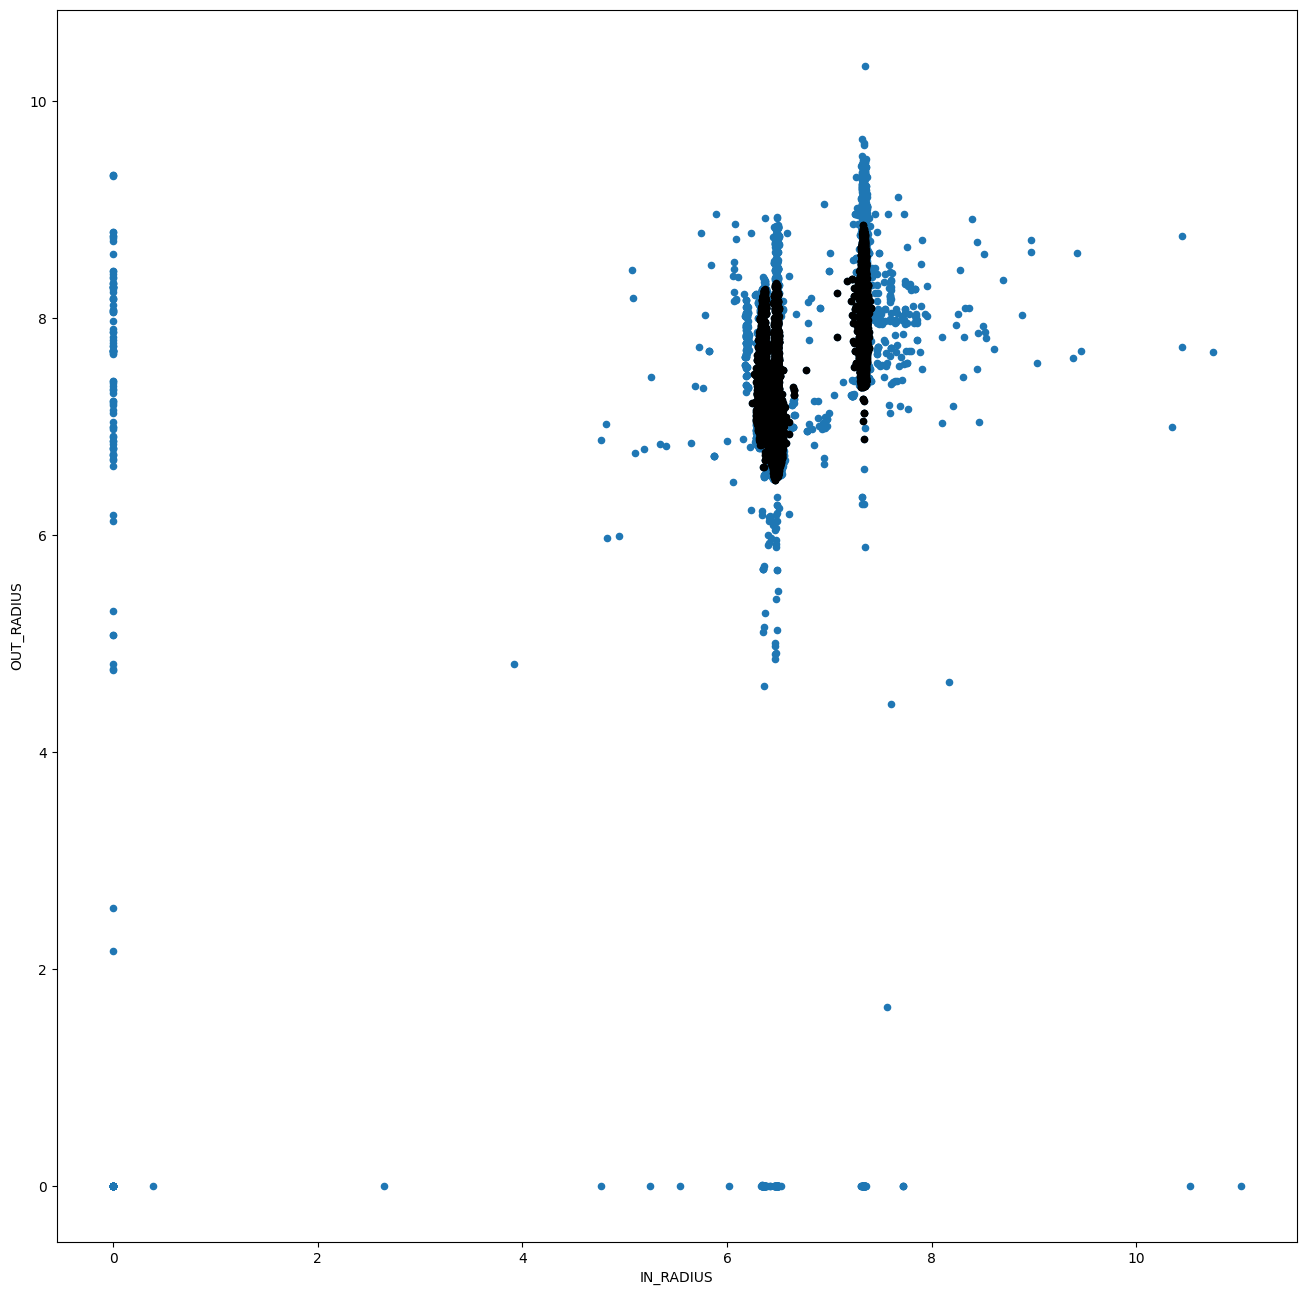

The shape of data after preprocessing :  (26245, 18)


In [16]:
# 이상치 처리

df_after = preprocessing_outlier(df_after)

=> 파란색 점은 Isolation Forest를 이용한 이상치 처리 전의 데이터이고

검은색 점은 이상치 처리 후의 데이터이다

전처리 후 데이터셋의 정보 확인

In [17]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26245 entries, 0 to 149363
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   EQUIP_ID      26245 non-null  object        
 1   MFG_DT        26245 non-null  datetime64[ns]
 2   SALE_CD       26245 non-null  object        
 3   MOLD_POS      26245 non-null  int64         
 4   REAL_POWER    26245 non-null  float32       
 5   MOLD_IN_TOP   26245 non-null  object        
 6   MOLD_IN_BOT   26245 non-null  object        
 7   MOLD_OUT_TOP  26245 non-null  object        
 8   MOLD_OUT_BOT  26245 non-null  object        
 9   IN_RADIUS     26245 non-null  float32       
 10  OUT_RADIUS    26245 non-null  float32       
 11  POWER         26245 non-null  float32       
 12  POWER1        26245 non-null  float32       
 13  POWER2        26245 non-null  float32       
 14  POWER3        26245 non-null  float32       
 15  POWER4        26245 non-null  float32   

## 데이터 특성 파악

요약 통계량 확인

In [18]:
df_after.describe()

,MFG_DT,MOLD_POS,REAL_POWER,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
count,26245,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000
mean,2020-08-19 19:29:56.502191104,4.498457,-3.955049,6.772677,7.485355,-3.955049,-3.949706,-3.957456,-3.965494,-3.975407,-3.988863
min,2020-01-02 00:00:00,1.000000,-10.000000,6.248300,6.503600,-10.000000,-10.250000,-10.250000,-10.250000,-10.250000,-10.250000
25%,2020-08-10 00:00:00,2.000000,-5.250000,6.460600,7.068100,-5.250000,-5.250000,-5.250000,-5.250000,-5.370000,-5.370000
50%,2020-09-19 00:00:00,4.000000,-3.750000,6.490600,7.423000,-3.750000,-3.870000,-3.870000,-3.870000,-3.870000,-3.870000
75%,2020-10-30 00:00:00,7.000000,-2.500000,7.328500,7.880700,-2.500000,-2.500000,-2.500000,-2.500000,-2.370000,-2.500000
max,2021-04-25 00:00:00,8.000000,-0.250000,7.405600,8.858800,-0.250000,0.000000,0.000000,0.000000,-0.040000,-0.040000
std,NaN,2.293268,1.973040,0.436783,0.514336,1.973040,1.978329,1.979559,1.982146,1.985281,1.985402


상관관계 파악

피어슨 상관 계수를 사용

피어슨 상관 계수는 -1과 1사이의 값을 가진다

절대값이 1에 가까울수록 변수 간의 선형관계가 강하다

<Axes: >

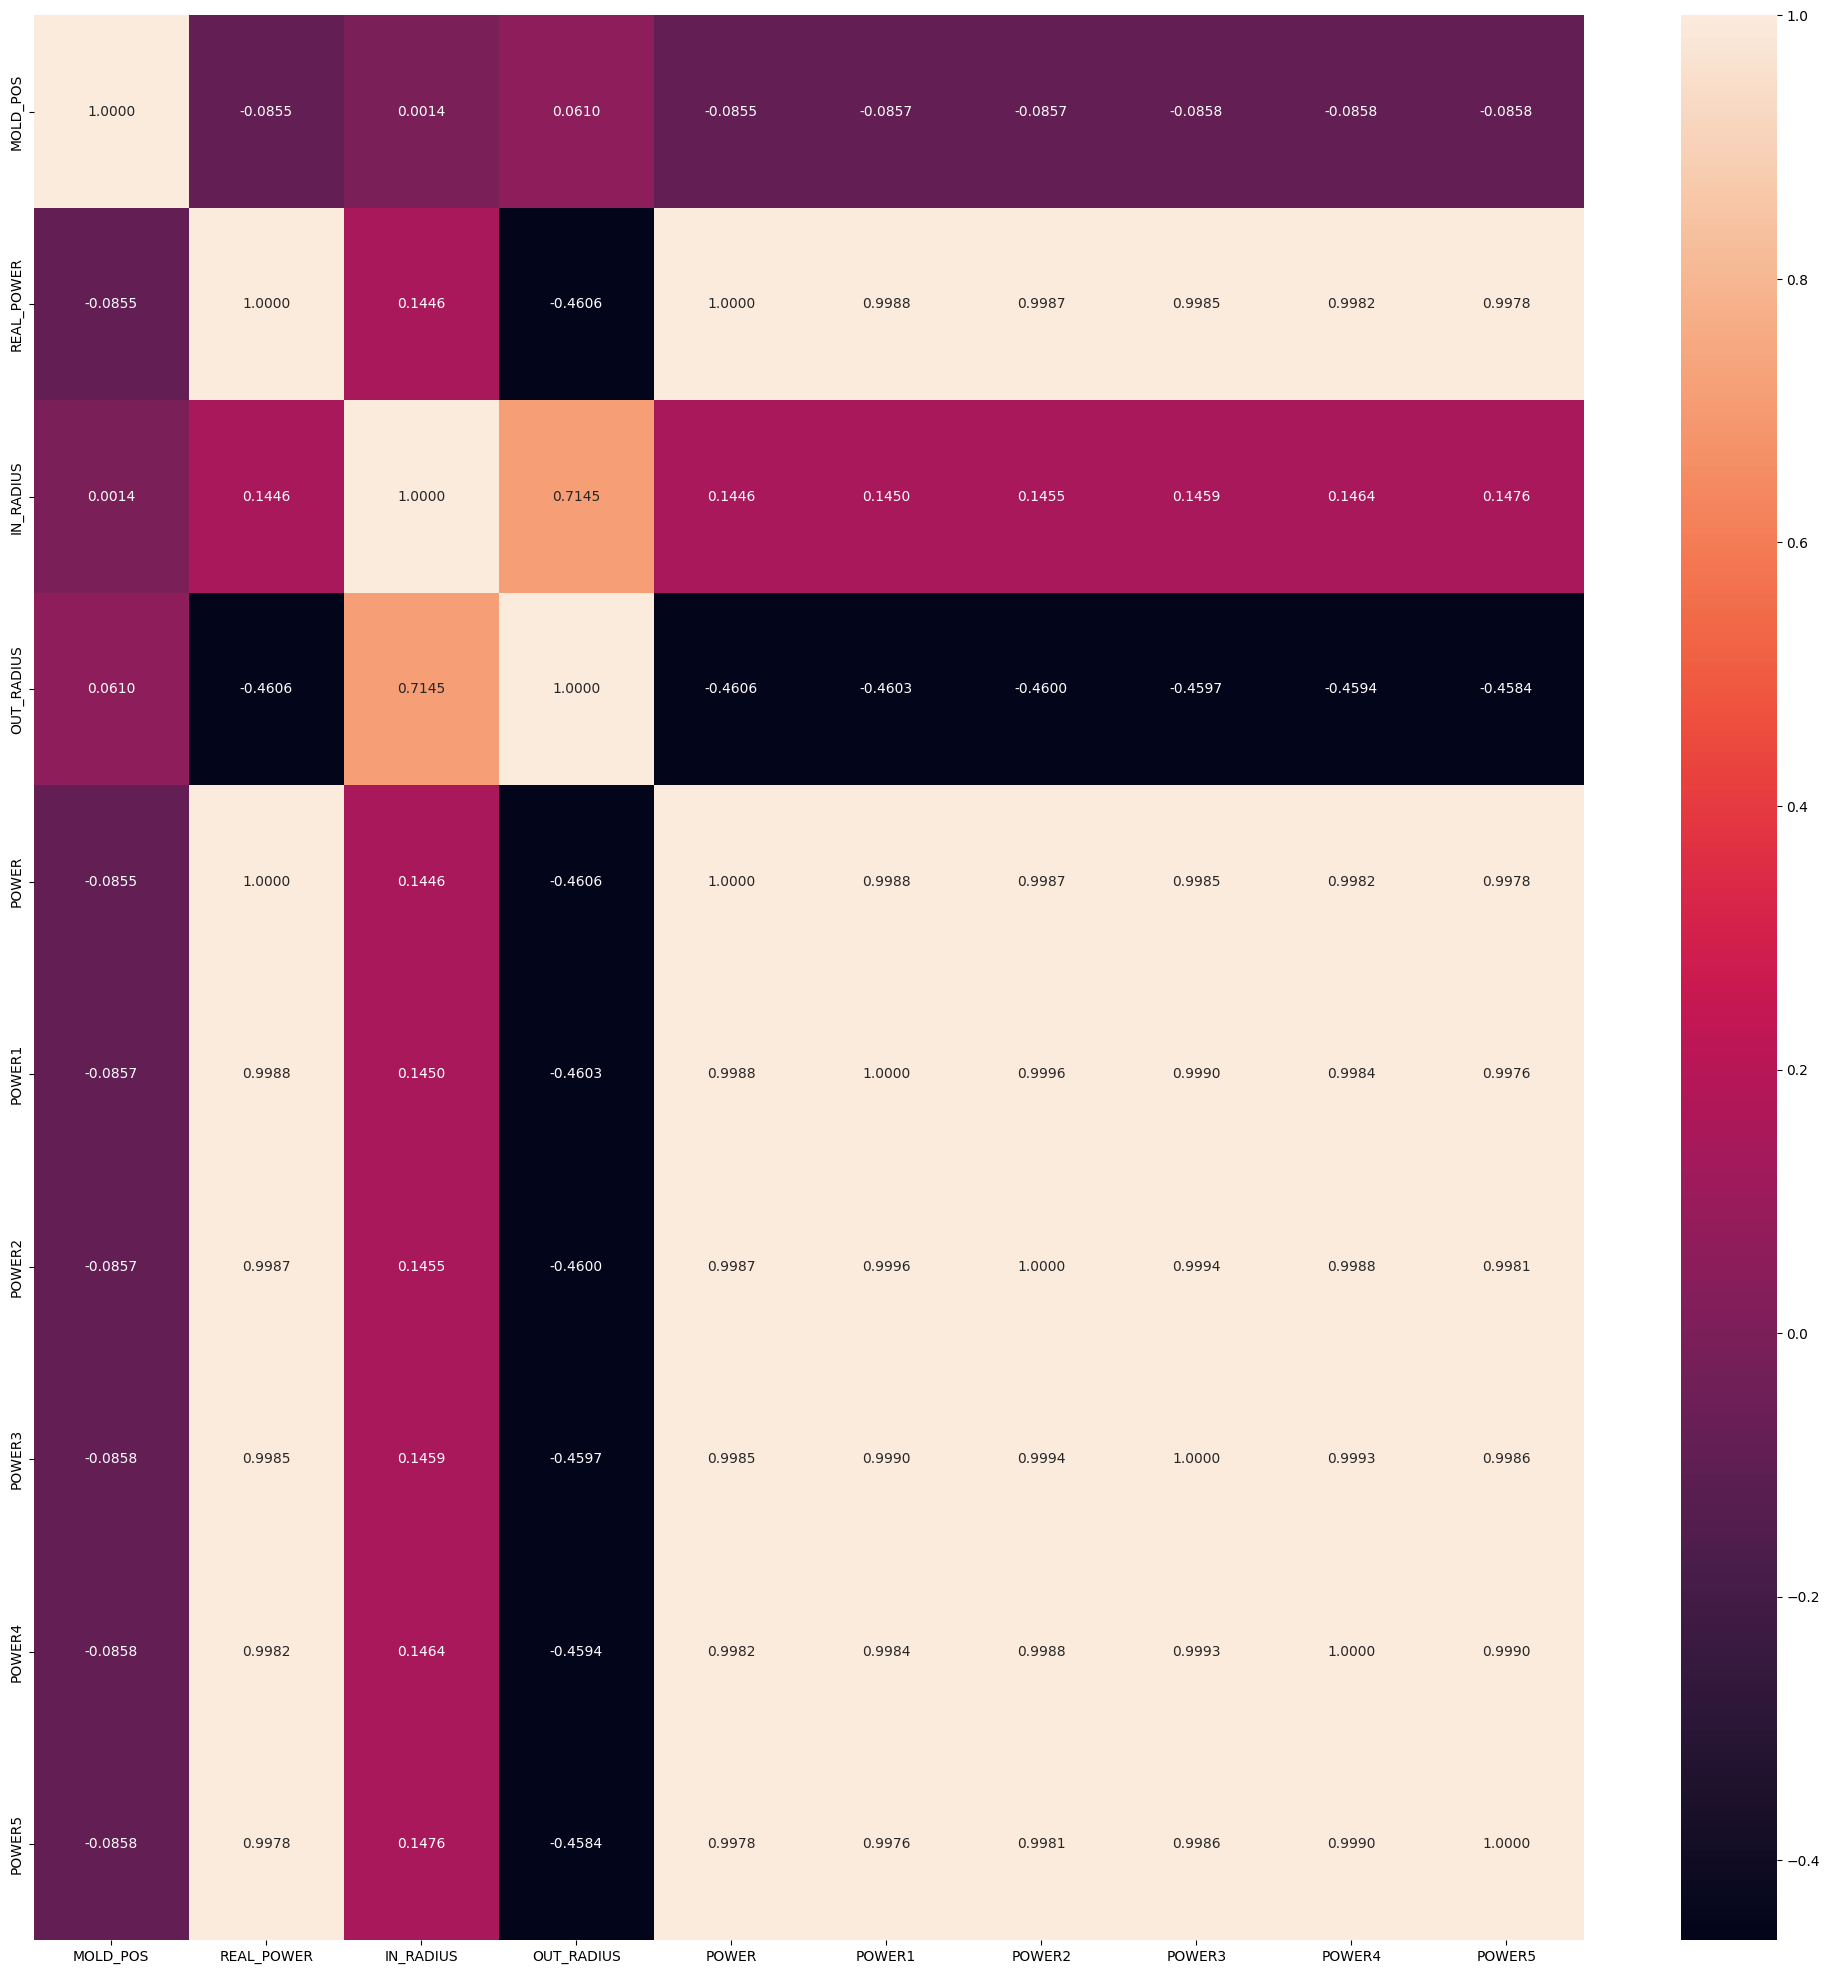

In [19]:
cols = df_after.describe().columns[1:]

plt.subplots(figsize = (25, 25))
sns.heatmap(df_after[cols].corr(), annot = True, fmt = '.4f')

=> 상관계수의 절댓값이 0.1과 0.3 사이이면 약한 상관관계, 0.3과 0.7사이이면 뚜렷한 선형관계, 0.7 이상인 경우 강한 선형관계를 나타낸다

## XGBoost 모델 학습

encoder XGBoost 학습과 예측에 동일한 컬럼을 가진 X 데이터를 생성하기 위해 사용

n_estimators 같이 상수를 사용하는 XGBoost 모델 파라미터도 변수로 정의

prepare_data는 모델 학습에 필요한 학습 데이터셋과 검증 데이터셋을 생성

In [20]:
# one-Hot-Encoding
encoder = None

# XGBoost
n_estimators = 6000
eta = 0.25
sub_sample = 0.9

In [21]:
# 학습 및 평가 데이터셋 분리 함수 

def prepare_data(df, numeric_cols, ohehot_cols, y_col):
    x_cols = numeric_cols + ohehot_cols
    
    df = df.dropna(how = 'any', subset = x_cols + y_col)
    
    X_data = df[x_cols]
    y_data = df[y_col]
    
    print('Splitting data into train set and test set')
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    
    print('The shape of X_train : {}, y_train : {}'.format(X_train.shape, y_train.shape))
    print('The shape of X_test : {}, y_test : {}'.format(X_test.shape, y_test.shape))
    
    # 도수에 따른 수치형 데이터의 최소, 최대값
    bounds = df.groupby(['REAL_POWER'])[numeric_cols].agg(['min', 'max'])
    
    return X_train, X_test, y_train, y_test, bounds

In [22]:
# One-Hot-Encoding함수

def one_hot_encoding(df, encoder):
    # encoder가 None이면 One-Hot-Encoder를 새로 생성 후 학습, 반환
    if encoder is None:
        print('ENCODER fit_transform')
        encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
        onehot = encoder.fit_transform(df[equip_info]) # 희소행렬 상태
    
    # 모델을 재사용해 데이터 반환
    else:
        print('ENCODER transform')
        onehot = encoder.transform(df[equip_info]) # 희소행렬 상태
        
    onehot_cols = encoder.get_feature_names_out(equip_info).ravel().tolist()
    df_onehot = np.hstack((df[radius].to_numpy(), onehot))
    df = pd.DataFrame(df_onehot, columns = radius + onehot_cols)
    
    return df, encoder

학습 데이터와 평가 데이터 분리

전처리 데이터 중 근시 데이터만 사용

- X데이터(학습용 데이터셋) : 'IN_RADIUS', 'OUT_RADIUS', 'EQUIP_ID', 'MOLD_POS'

- Y데이터(평가용 데이터셋) : X데이터를 기준으로 묵었을 때의 'POWER1', 'POWER2', 'POWER3', 'POWER3', 'POWER5'의 값

<br>

melt 함수를 사용하여 데이터를 "long" 형식으로 변환하는 과정을 수행

- id_vars: 데이터프레임에서 식별자로 유지할 열의 이름을 지정

- value_vars: 데이터프레임에서 값을 변환할 열의 이름을 지정

- value_name: 변환된 값 열의 이름을 지정

In [23]:
df_pred = df_after.reset_index().melt(id_vars = ['index', 'SALE_CD', 'REAL_POWER'] + radius + equip_info,
                                     value_vars = powers,
                                     value_name = 'y')

print('The shape of data which will be returned : ', df_pred.shape)

The shape of data which will be returned :  (131225, 9)


In [24]:
df_pred

,index,SALE_CD,REAL_POWER,IN_RADIUS,OUT_RADIUS,EQUIP_ID,MOLD_POS,variable,y
0,0,SALES 1,-6.50,6.3564,7.4551,EQUIP2,1,POWER1,-6.25
1,1,SALES 3,-7.50,6.3600,7.6877,EQUIP2,6,POWER1,-7.50
2,2,SALES 4,-0.75,7.3411,7.5236,EQUIP3,1,POWER1,-0.87
3,3,SALES 5,-4.00,6.4829,7.1508,EQUIP4,8,POWER1,-4.00
4,4,SALES 6,-8.50,6.4800,8.2939,EQUIP5,6,POWER1,-8.25
...,...,...,...,...,...,...,...,...,...
131220,149358,SALES 114,-2.25,6.5197,6.8885,EQUIP12,4,POWER5,-2.25
131221,149360,SALES 114,-4.00,6.3326,6.9997,EQUIP37,1,POWER5,-4.00
131222,149361,SALES 114,-4.75,6.3279,7.0979,EQUIP37,8,POWER5,-4.75
131223,149362,SALES 114,-5.25,6.3304,7.1881,EQUIP13,4,POWER5,-5.25


In [25]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131225 entries, 0 to 131224
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       131225 non-null  int64  
 1   SALE_CD     131225 non-null  object 
 2   REAL_POWER  131225 non-null  float32
 3   IN_RADIUS   131225 non-null  float32
 4   OUT_RADIUS  131225 non-null  float32
 5   EQUIP_ID    131225 non-null  object 
 6   MOLD_POS    131225 non-null  int64  
 7   variable    131225 non-null  object 
 8   y           131225 non-null  float32
dtypes: float32(4), int64(2), object(3)
memory usage: 7.0+ MB


학습 및 평가 데이터셋 분리

In [26]:
X_train, X_test, y_train, y_test, bounds = prepare_data(df = df_pred,
                                                        numeric_cols = radius,
                                                        ohehot_cols = equip_info,
                                                        y_col = ['y'])

Splitting data into train set and test set
The shape of X_train : (91857, 4), y_train : (91857, 1)
The shape of X_test : (39368, 4), y_test : (39368, 1)


XGBoost 호출 및 파라미터 설정

GPU 여부에 따라 모델의 파라미터 값을 다르게 설정

In [27]:
if len(GPUtil.getGPUs()) < 1:
    xgb = XGBRegressor(n_estimators = n_estimators,
                       objective = 'reg:squarederror',
                       eta = eta,
                       tree_method = 'hist',
                       gpu_id = 0,
                       subsample = sub_sample)
    
else:
    xgb = XGBRegressor(n_estimators = n_estimators,
                       objective = 'reg:squarederror',
                       eta = eta,
                       tree_method = 'gpu_hist',
                       gpu_id = 0,
                       subsample = sub_sample)    

X변수 데이터셋(X_train, X_test)의 One-Hot-Encoding 진행

X_train에는 fit(), transform을 진행

X_test에는 transform만 진행

In [28]:
X_train, encoder = one_hot_encoding(X_train, encoder)
X_test, encoder = one_hot_encoding(X_test, encoder)

ENCODER fit_transform
ENCODER transform


In [29]:
X_train.columns

Index(['IN_RADIUS', 'OUT_RADIUS', 'EQUIP_ID_EQUIP1', 'EQUIP_ID_EQUIP10',
       'EQUIP_ID_EQUIP11', 'EQUIP_ID_EQUIP12', 'EQUIP_ID_EQUIP13',
       'EQUIP_ID_EQUIP14', 'EQUIP_ID_EQUIP15', 'EQUIP_ID_EQUIP16',
       'EQUIP_ID_EQUIP17', 'EQUIP_ID_EQUIP18', 'EQUIP_ID_EQUIP19',
       'EQUIP_ID_EQUIP2', 'EQUIP_ID_EQUIP20', 'EQUIP_ID_EQUIP21',
       'EQUIP_ID_EQUIP25', 'EQUIP_ID_EQUIP26', 'EQUIP_ID_EQUIP27',
       'EQUIP_ID_EQUIP28', 'EQUIP_ID_EQUIP29', 'EQUIP_ID_EQUIP3',
       'EQUIP_ID_EQUIP31', 'EQUIP_ID_EQUIP32', 'EQUIP_ID_EQUIP33',
       'EQUIP_ID_EQUIP34', 'EQUIP_ID_EQUIP35', 'EQUIP_ID_EQUIP36',
       'EQUIP_ID_EQUIP37', 'EQUIP_ID_EQUIP38', 'EQUIP_ID_EQUIP4',
       'EQUIP_ID_EQUIP5', 'EQUIP_ID_EQUIP6', 'EQUIP_ID_EQUIP7',
       'EQUIP_ID_EQUIP8', 'EQUIP_ID_EQUIP9', 'MOLD_POS_1', 'MOLD_POS_2',
       'MOLD_POS_3', 'MOLD_POS_4', 'MOLD_POS_5', 'MOLD_POS_6', 'MOLD_POS_7',
       'MOLD_POS_8'],
      dtype='object')

XGBoost 모델 학습

In [30]:
history = xgb.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)],
                  eval_metric = 'mae', early_stopping_rounds = n_estimators / 10)


[0]	validation_0-mae:1.30812	validation_1-mae:1.30755
[1]	validation_0-mae:1.07603	validation_1-mae:1.07596
[2]	validation_0-mae:0.90962	validation_1-mae:0.91013
[3]	validation_0-mae:0.78089	validation_1-mae:0.78145
[4]	validation_0-mae:0.68540	validation_1-mae:0.68629
[5]	validation_0-mae:0.61596	validation_1-mae:0.61635
[6]	validation_0-mae:0.56351	validation_1-mae:0.56399
[7]	validation_0-mae:0.52584	validation_1-mae:0.52553
[8]	validation_0-mae:0.49794	validation_1-mae:0.49786
[9]	validation_0-mae:0.47760	validation_1-mae:0.47721
[10]	validation_0-mae:0.46035	validation_1-mae:0.45968
[11]	validation_0-mae:0.45113	validation_1-mae:0.45075
[12]	validation_0-mae:0.44001	validation_1-mae:0.43948
[13]	validation_0-mae:0.42837	validation_1-mae:0.42790
[14]	validation_0-mae:0.42360	validation_1-mae:0.42356
[15]	validation_0-mae:0.41809	validation_1-mae:0.41827
[16]	validation_0-mae:0.41349	validation_1-mae:0.41371
[17]	validation_0-mae:0.40707	validation_1-mae:0.40737
[18]	validation_0-ma

[149]	validation_0-mae:0.26375	validation_1-mae:0.27630
[150]	validation_0-mae:0.26269	validation_1-mae:0.27523
[151]	validation_0-mae:0.26230	validation_1-mae:0.27496
[152]	validation_0-mae:0.26177	validation_1-mae:0.27439
[153]	validation_0-mae:0.26098	validation_1-mae:0.27346
[154]	validation_0-mae:0.26060	validation_1-mae:0.27313
[155]	validation_0-mae:0.25991	validation_1-mae:0.27250
[156]	validation_0-mae:0.25924	validation_1-mae:0.27195
[157]	validation_0-mae:0.25884	validation_1-mae:0.27161
[158]	validation_0-mae:0.25852	validation_1-mae:0.27133
[159]	validation_0-mae:0.25786	validation_1-mae:0.27086
[160]	validation_0-mae:0.25770	validation_1-mae:0.27071
[161]	validation_0-mae:0.25710	validation_1-mae:0.27025
[162]	validation_0-mae:0.25657	validation_1-mae:0.26978
[163]	validation_0-mae:0.25599	validation_1-mae:0.26906
[164]	validation_0-mae:0.25573	validation_1-mae:0.26883
[165]	validation_0-mae:0.25526	validation_1-mae:0.26833
[166]	validation_0-mae:0.25460	validation_1-mae:

[296]	validation_0-mae:0.20629	validation_1-mae:0.22439
[297]	validation_0-mae:0.20591	validation_1-mae:0.22397
[298]	validation_0-mae:0.20557	validation_1-mae:0.22363
[299]	validation_0-mae:0.20536	validation_1-mae:0.22343
[300]	validation_0-mae:0.20506	validation_1-mae:0.22312
[301]	validation_0-mae:0.20467	validation_1-mae:0.22273
[302]	validation_0-mae:0.20433	validation_1-mae:0.22245
[303]	validation_0-mae:0.20397	validation_1-mae:0.22204
[304]	validation_0-mae:0.20381	validation_1-mae:0.22191
[305]	validation_0-mae:0.20367	validation_1-mae:0.22178
[306]	validation_0-mae:0.20337	validation_1-mae:0.22152
[307]	validation_0-mae:0.20311	validation_1-mae:0.22120
[308]	validation_0-mae:0.20289	validation_1-mae:0.22098
[309]	validation_0-mae:0.20258	validation_1-mae:0.22071
[310]	validation_0-mae:0.20232	validation_1-mae:0.22045
[311]	validation_0-mae:0.20211	validation_1-mae:0.22023
[312]	validation_0-mae:0.20171	validation_1-mae:0.21986
[313]	validation_0-mae:0.20154	validation_1-mae:

[443]	validation_0-mae:0.17172	validation_1-mae:0.19094
[444]	validation_0-mae:0.17147	validation_1-mae:0.19074
[445]	validation_0-mae:0.17125	validation_1-mae:0.19052
[446]	validation_0-mae:0.17105	validation_1-mae:0.19031
[447]	validation_0-mae:0.17083	validation_1-mae:0.19002
[448]	validation_0-mae:0.17067	validation_1-mae:0.18990
[449]	validation_0-mae:0.17051	validation_1-mae:0.18976
[450]	validation_0-mae:0.17030	validation_1-mae:0.18962
[451]	validation_0-mae:0.17016	validation_1-mae:0.18948
[452]	validation_0-mae:0.17001	validation_1-mae:0.18930
[453]	validation_0-mae:0.16992	validation_1-mae:0.18920
[454]	validation_0-mae:0.16981	validation_1-mae:0.18912
[455]	validation_0-mae:0.16971	validation_1-mae:0.18903
[456]	validation_0-mae:0.16956	validation_1-mae:0.18886
[457]	validation_0-mae:0.16942	validation_1-mae:0.18866
[458]	validation_0-mae:0.16923	validation_1-mae:0.18849
[459]	validation_0-mae:0.16901	validation_1-mae:0.18836
[460]	validation_0-mae:0.16890	validation_1-mae:

[590]	validation_0-mae:0.14833	validation_1-mae:0.16865
[591]	validation_0-mae:0.14827	validation_1-mae:0.16859
[592]	validation_0-mae:0.14817	validation_1-mae:0.16849
[593]	validation_0-mae:0.14803	validation_1-mae:0.16835
[594]	validation_0-mae:0.14787	validation_1-mae:0.16814
[595]	validation_0-mae:0.14774	validation_1-mae:0.16805
[596]	validation_0-mae:0.14760	validation_1-mae:0.16790
[597]	validation_0-mae:0.14743	validation_1-mae:0.16774
[598]	validation_0-mae:0.14731	validation_1-mae:0.16760
[599]	validation_0-mae:0.14717	validation_1-mae:0.16747
[600]	validation_0-mae:0.14703	validation_1-mae:0.16733
[601]	validation_0-mae:0.14688	validation_1-mae:0.16719
[602]	validation_0-mae:0.14669	validation_1-mae:0.16705
[603]	validation_0-mae:0.14650	validation_1-mae:0.16688
[604]	validation_0-mae:0.14634	validation_1-mae:0.16673
[605]	validation_0-mae:0.14622	validation_1-mae:0.16663
[606]	validation_0-mae:0.14609	validation_1-mae:0.16653
[607]	validation_0-mae:0.14605	validation_1-mae:

[737]	validation_0-mae:0.13179	validation_1-mae:0.15226
[738]	validation_0-mae:0.13165	validation_1-mae:0.15212
[739]	validation_0-mae:0.13156	validation_1-mae:0.15198
[740]	validation_0-mae:0.13144	validation_1-mae:0.15186
[741]	validation_0-mae:0.13138	validation_1-mae:0.15179
[742]	validation_0-mae:0.13129	validation_1-mae:0.15167
[743]	validation_0-mae:0.13120	validation_1-mae:0.15160
[744]	validation_0-mae:0.13106	validation_1-mae:0.15145
[745]	validation_0-mae:0.13096	validation_1-mae:0.15133
[746]	validation_0-mae:0.13094	validation_1-mae:0.15131
[747]	validation_0-mae:0.13083	validation_1-mae:0.15120
[748]	validation_0-mae:0.13070	validation_1-mae:0.15108
[749]	validation_0-mae:0.13063	validation_1-mae:0.15099
[750]	validation_0-mae:0.13057	validation_1-mae:0.15094
[751]	validation_0-mae:0.13054	validation_1-mae:0.15092
[752]	validation_0-mae:0.13039	validation_1-mae:0.15079
[753]	validation_0-mae:0.13029	validation_1-mae:0.15070
[754]	validation_0-mae:0.13021	validation_1-mae:

[884]	validation_0-mae:0.11865	validation_1-mae:0.13914
[885]	validation_0-mae:0.11858	validation_1-mae:0.13904
[886]	validation_0-mae:0.11855	validation_1-mae:0.13900
[887]	validation_0-mae:0.11852	validation_1-mae:0.13897
[888]	validation_0-mae:0.11847	validation_1-mae:0.13890
[889]	validation_0-mae:0.11843	validation_1-mae:0.13884
[890]	validation_0-mae:0.11839	validation_1-mae:0.13880
[891]	validation_0-mae:0.11835	validation_1-mae:0.13876
[892]	validation_0-mae:0.11827	validation_1-mae:0.13867
[893]	validation_0-mae:0.11816	validation_1-mae:0.13854
[894]	validation_0-mae:0.11808	validation_1-mae:0.13847
[895]	validation_0-mae:0.11799	validation_1-mae:0.13836
[896]	validation_0-mae:0.11795	validation_1-mae:0.13833
[897]	validation_0-mae:0.11790	validation_1-mae:0.13829
[898]	validation_0-mae:0.11781	validation_1-mae:0.13821
[899]	validation_0-mae:0.11774	validation_1-mae:0.13813
[900]	validation_0-mae:0.11767	validation_1-mae:0.13806
[901]	validation_0-mae:0.11764	validation_1-mae:

[1030]	validation_0-mae:0.10910	validation_1-mae:0.12948
[1031]	validation_0-mae:0.10903	validation_1-mae:0.12940
[1032]	validation_0-mae:0.10898	validation_1-mae:0.12935
[1033]	validation_0-mae:0.10896	validation_1-mae:0.12933
[1034]	validation_0-mae:0.10893	validation_1-mae:0.12929
[1035]	validation_0-mae:0.10883	validation_1-mae:0.12920
[1036]	validation_0-mae:0.10877	validation_1-mae:0.12913
[1037]	validation_0-mae:0.10876	validation_1-mae:0.12911
[1038]	validation_0-mae:0.10869	validation_1-mae:0.12906
[1039]	validation_0-mae:0.10862	validation_1-mae:0.12898
[1040]	validation_0-mae:0.10854	validation_1-mae:0.12891
[1041]	validation_0-mae:0.10851	validation_1-mae:0.12888
[1042]	validation_0-mae:0.10844	validation_1-mae:0.12879
[1043]	validation_0-mae:0.10837	validation_1-mae:0.12872
[1044]	validation_0-mae:0.10831	validation_1-mae:0.12864
[1045]	validation_0-mae:0.10825	validation_1-mae:0.12856
[1046]	validation_0-mae:0.10818	validation_1-mae:0.12850
[1047]	validation_0-mae:0.10814

[1174]	validation_0-mae:0.10173	validation_1-mae:0.12181
[1175]	validation_0-mae:0.10170	validation_1-mae:0.12180
[1176]	validation_0-mae:0.10163	validation_1-mae:0.12174
[1177]	validation_0-mae:0.10158	validation_1-mae:0.12169
[1178]	validation_0-mae:0.10153	validation_1-mae:0.12163
[1179]	validation_0-mae:0.10147	validation_1-mae:0.12158
[1180]	validation_0-mae:0.10145	validation_1-mae:0.12156
[1181]	validation_0-mae:0.10140	validation_1-mae:0.12153
[1182]	validation_0-mae:0.10136	validation_1-mae:0.12148
[1183]	validation_0-mae:0.10130	validation_1-mae:0.12141
[1184]	validation_0-mae:0.10127	validation_1-mae:0.12139
[1185]	validation_0-mae:0.10125	validation_1-mae:0.12135
[1186]	validation_0-mae:0.10123	validation_1-mae:0.12133
[1187]	validation_0-mae:0.10118	validation_1-mae:0.12127
[1188]	validation_0-mae:0.10112	validation_1-mae:0.12123
[1189]	validation_0-mae:0.10107	validation_1-mae:0.12116
[1190]	validation_0-mae:0.10104	validation_1-mae:0.12111
[1191]	validation_0-mae:0.10101

[1318]	validation_0-mae:0.09598	validation_1-mae:0.11599
[1319]	validation_0-mae:0.09595	validation_1-mae:0.11594
[1320]	validation_0-mae:0.09592	validation_1-mae:0.11589
[1321]	validation_0-mae:0.09589	validation_1-mae:0.11585
[1322]	validation_0-mae:0.09585	validation_1-mae:0.11581
[1323]	validation_0-mae:0.09581	validation_1-mae:0.11578
[1324]	validation_0-mae:0.09579	validation_1-mae:0.11578
[1325]	validation_0-mae:0.09576	validation_1-mae:0.11573
[1326]	validation_0-mae:0.09572	validation_1-mae:0.11567
[1327]	validation_0-mae:0.09568	validation_1-mae:0.11564
[1328]	validation_0-mae:0.09562	validation_1-mae:0.11558
[1329]	validation_0-mae:0.09559	validation_1-mae:0.11555
[1330]	validation_0-mae:0.09556	validation_1-mae:0.11551
[1331]	validation_0-mae:0.09552	validation_1-mae:0.11549
[1332]	validation_0-mae:0.09549	validation_1-mae:0.11545
[1333]	validation_0-mae:0.09547	validation_1-mae:0.11543
[1334]	validation_0-mae:0.09546	validation_1-mae:0.11541
[1335]	validation_0-mae:0.09541

[1462]	validation_0-mae:0.09130	validation_1-mae:0.11125
[1463]	validation_0-mae:0.09129	validation_1-mae:0.11124
[1464]	validation_0-mae:0.09129	validation_1-mae:0.11124
[1465]	validation_0-mae:0.09127	validation_1-mae:0.11121
[1466]	validation_0-mae:0.09124	validation_1-mae:0.11118
[1467]	validation_0-mae:0.09122	validation_1-mae:0.11117
[1468]	validation_0-mae:0.09120	validation_1-mae:0.11115
[1469]	validation_0-mae:0.09119	validation_1-mae:0.11113
[1470]	validation_0-mae:0.09117	validation_1-mae:0.11112
[1471]	validation_0-mae:0.09114	validation_1-mae:0.11108
[1472]	validation_0-mae:0.09112	validation_1-mae:0.11107
[1473]	validation_0-mae:0.09107	validation_1-mae:0.11102
[1474]	validation_0-mae:0.09103	validation_1-mae:0.11096
[1475]	validation_0-mae:0.09100	validation_1-mae:0.11095
[1476]	validation_0-mae:0.09098	validation_1-mae:0.11092
[1477]	validation_0-mae:0.09097	validation_1-mae:0.11091
[1478]	validation_0-mae:0.09095	validation_1-mae:0.11089
[1479]	validation_0-mae:0.09091

[1606]	validation_0-mae:0.08788	validation_1-mae:0.10765
[1607]	validation_0-mae:0.08783	validation_1-mae:0.10761
[1608]	validation_0-mae:0.08782	validation_1-mae:0.10759
[1609]	validation_0-mae:0.08779	validation_1-mae:0.10756
[1610]	validation_0-mae:0.08778	validation_1-mae:0.10755
[1611]	validation_0-mae:0.08774	validation_1-mae:0.10751
[1612]	validation_0-mae:0.08768	validation_1-mae:0.10744
[1613]	validation_0-mae:0.08764	validation_1-mae:0.10741
[1614]	validation_0-mae:0.08761	validation_1-mae:0.10739
[1615]	validation_0-mae:0.08759	validation_1-mae:0.10735
[1616]	validation_0-mae:0.08757	validation_1-mae:0.10732
[1617]	validation_0-mae:0.08755	validation_1-mae:0.10729
[1618]	validation_0-mae:0.08749	validation_1-mae:0.10722
[1619]	validation_0-mae:0.08747	validation_1-mae:0.10720
[1620]	validation_0-mae:0.08745	validation_1-mae:0.10718
[1621]	validation_0-mae:0.08744	validation_1-mae:0.10717
[1622]	validation_0-mae:0.08739	validation_1-mae:0.10712
[1623]	validation_0-mae:0.08737

[1750]	validation_0-mae:0.08460	validation_1-mae:0.10409
[1751]	validation_0-mae:0.08460	validation_1-mae:0.10409
[1752]	validation_0-mae:0.08458	validation_1-mae:0.10408
[1753]	validation_0-mae:0.08457	validation_1-mae:0.10405
[1754]	validation_0-mae:0.08454	validation_1-mae:0.10403
[1755]	validation_0-mae:0.08451	validation_1-mae:0.10399
[1756]	validation_0-mae:0.08448	validation_1-mae:0.10398
[1757]	validation_0-mae:0.08447	validation_1-mae:0.10396
[1758]	validation_0-mae:0.08446	validation_1-mae:0.10396
[1759]	validation_0-mae:0.08446	validation_1-mae:0.10395
[1760]	validation_0-mae:0.08444	validation_1-mae:0.10393
[1761]	validation_0-mae:0.08440	validation_1-mae:0.10389
[1762]	validation_0-mae:0.08439	validation_1-mae:0.10387
[1763]	validation_0-mae:0.08437	validation_1-mae:0.10386
[1764]	validation_0-mae:0.08433	validation_1-mae:0.10381
[1765]	validation_0-mae:0.08432	validation_1-mae:0.10380
[1766]	validation_0-mae:0.08429	validation_1-mae:0.10376
[1767]	validation_0-mae:0.08426

[1894]	validation_0-mae:0.08202	validation_1-mae:0.10132
[1895]	validation_0-mae:0.08202	validation_1-mae:0.10132
[1896]	validation_0-mae:0.08201	validation_1-mae:0.10131
[1897]	validation_0-mae:0.08201	validation_1-mae:0.10131
[1898]	validation_0-mae:0.08198	validation_1-mae:0.10129
[1899]	validation_0-mae:0.08197	validation_1-mae:0.10126
[1900]	validation_0-mae:0.08197	validation_1-mae:0.10127
[1901]	validation_0-mae:0.08195	validation_1-mae:0.10125
[1902]	validation_0-mae:0.08192	validation_1-mae:0.10122
[1903]	validation_0-mae:0.08191	validation_1-mae:0.10121
[1904]	validation_0-mae:0.08190	validation_1-mae:0.10120
[1905]	validation_0-mae:0.08187	validation_1-mae:0.10117
[1906]	validation_0-mae:0.08186	validation_1-mae:0.10116
[1907]	validation_0-mae:0.08184	validation_1-mae:0.10114
[1908]	validation_0-mae:0.08182	validation_1-mae:0.10110
[1909]	validation_0-mae:0.08179	validation_1-mae:0.10108
[1910]	validation_0-mae:0.08178	validation_1-mae:0.10107
[1911]	validation_0-mae:0.08177

[2038]	validation_0-mae:0.07983	validation_1-mae:0.09915
[2039]	validation_0-mae:0.07982	validation_1-mae:0.09913
[2040]	validation_0-mae:0.07981	validation_1-mae:0.09913
[2041]	validation_0-mae:0.07978	validation_1-mae:0.09910
[2042]	validation_0-mae:0.07977	validation_1-mae:0.09910
[2043]	validation_0-mae:0.07975	validation_1-mae:0.09908
[2044]	validation_0-mae:0.07973	validation_1-mae:0.09906
[2045]	validation_0-mae:0.07973	validation_1-mae:0.09906
[2046]	validation_0-mae:0.07972	validation_1-mae:0.09906
[2047]	validation_0-mae:0.07971	validation_1-mae:0.09906
[2048]	validation_0-mae:0.07970	validation_1-mae:0.09905
[2049]	validation_0-mae:0.07970	validation_1-mae:0.09904
[2050]	validation_0-mae:0.07967	validation_1-mae:0.09899
[2051]	validation_0-mae:0.07966	validation_1-mae:0.09898
[2052]	validation_0-mae:0.07965	validation_1-mae:0.09896
[2053]	validation_0-mae:0.07964	validation_1-mae:0.09894
[2054]	validation_0-mae:0.07964	validation_1-mae:0.09894
[2055]	validation_0-mae:0.07962

[2182]	validation_0-mae:0.07789	validation_1-mae:0.09703
[2183]	validation_0-mae:0.07788	validation_1-mae:0.09702
[2184]	validation_0-mae:0.07785	validation_1-mae:0.09697
[2185]	validation_0-mae:0.07784	validation_1-mae:0.09696
[2186]	validation_0-mae:0.07783	validation_1-mae:0.09695
[2187]	validation_0-mae:0.07783	validation_1-mae:0.09695
[2188]	validation_0-mae:0.07782	validation_1-mae:0.09695
[2189]	validation_0-mae:0.07781	validation_1-mae:0.09693
[2190]	validation_0-mae:0.07779	validation_1-mae:0.09692
[2191]	validation_0-mae:0.07777	validation_1-mae:0.09690
[2192]	validation_0-mae:0.07776	validation_1-mae:0.09689
[2193]	validation_0-mae:0.07775	validation_1-mae:0.09688
[2194]	validation_0-mae:0.07774	validation_1-mae:0.09686
[2195]	validation_0-mae:0.07773	validation_1-mae:0.09684
[2196]	validation_0-mae:0.07772	validation_1-mae:0.09684
[2197]	validation_0-mae:0.07772	validation_1-mae:0.09684
[2198]	validation_0-mae:0.07771	validation_1-mae:0.09681
[2199]	validation_0-mae:0.07770

[2469]	validation_0-mae:0.07475	validation_1-mae:0.09376
[2470]	validation_0-mae:0.07475	validation_1-mae:0.09376
[2471]	validation_0-mae:0.07473	validation_1-mae:0.09373
[2472]	validation_0-mae:0.07473	validation_1-mae:0.09373
[2473]	validation_0-mae:0.07471	validation_1-mae:0.09372
[2474]	validation_0-mae:0.07471	validation_1-mae:0.09372
[2475]	validation_0-mae:0.07471	validation_1-mae:0.09372
[2476]	validation_0-mae:0.07470	validation_1-mae:0.09371
[2477]	validation_0-mae:0.07469	validation_1-mae:0.09369
[2478]	validation_0-mae:0.07466	validation_1-mae:0.09367
[2479]	validation_0-mae:0.07465	validation_1-mae:0.09366
[2480]	validation_0-mae:0.07465	validation_1-mae:0.09365
[2481]	validation_0-mae:0.07464	validation_1-mae:0.09366
[2482]	validation_0-mae:0.07464	validation_1-mae:0.09365
[2483]	validation_0-mae:0.07462	validation_1-mae:0.09363
[2484]	validation_0-mae:0.07462	validation_1-mae:0.09361
[2485]	validation_0-mae:0.07461	validation_1-mae:0.09360
[2486]	validation_0-mae:0.07462

[2613]	validation_0-mae:0.07334	validation_1-mae:0.09227
[2614]	validation_0-mae:0.07332	validation_1-mae:0.09228
[2615]	validation_0-mae:0.07331	validation_1-mae:0.09226
[2616]	validation_0-mae:0.07329	validation_1-mae:0.09225
[2617]	validation_0-mae:0.07327	validation_1-mae:0.09224
[2618]	validation_0-mae:0.07327	validation_1-mae:0.09224
[2619]	validation_0-mae:0.07327	validation_1-mae:0.09223
[2620]	validation_0-mae:0.07327	validation_1-mae:0.09221
[2621]	validation_0-mae:0.07326	validation_1-mae:0.09220
[2622]	validation_0-mae:0.07326	validation_1-mae:0.09220
[2623]	validation_0-mae:0.07324	validation_1-mae:0.09218
[2624]	validation_0-mae:0.07324	validation_1-mae:0.09217
[2625]	validation_0-mae:0.07323	validation_1-mae:0.09216
[2626]	validation_0-mae:0.07323	validation_1-mae:0.09216
[2627]	validation_0-mae:0.07322	validation_1-mae:0.09215
[2628]	validation_0-mae:0.07322	validation_1-mae:0.09215
[2629]	validation_0-mae:0.07320	validation_1-mae:0.09213
[2630]	validation_0-mae:0.07319

[2900]	validation_0-mae:0.07125	validation_1-mae:0.08998
[2901]	validation_0-mae:0.07124	validation_1-mae:0.08995
[2902]	validation_0-mae:0.07123	validation_1-mae:0.08994
[2903]	validation_0-mae:0.07122	validation_1-mae:0.08993
[2904]	validation_0-mae:0.07121	validation_1-mae:0.08993
[2905]	validation_0-mae:0.07120	validation_1-mae:0.08992
[2906]	validation_0-mae:0.07120	validation_1-mae:0.08991
[2907]	validation_0-mae:0.07120	validation_1-mae:0.08992
[2908]	validation_0-mae:0.07120	validation_1-mae:0.08991
[2909]	validation_0-mae:0.07120	validation_1-mae:0.08990
[2910]	validation_0-mae:0.07119	validation_1-mae:0.08989
[2911]	validation_0-mae:0.07119	validation_1-mae:0.08989
[2912]	validation_0-mae:0.07119	validation_1-mae:0.08989
[2913]	validation_0-mae:0.07119	validation_1-mae:0.08989
[2914]	validation_0-mae:0.07118	validation_1-mae:0.08987
[2915]	validation_0-mae:0.07117	validation_1-mae:0.08986
[2916]	validation_0-mae:0.07116	validation_1-mae:0.08985
[2917]	validation_0-mae:0.07116

[3044]	validation_0-mae:0.07046	validation_1-mae:0.08911
[3045]	validation_0-mae:0.07045	validation_1-mae:0.08910
[3046]	validation_0-mae:0.07045	validation_1-mae:0.08910
[3047]	validation_0-mae:0.07043	validation_1-mae:0.08908
[3048]	validation_0-mae:0.07044	validation_1-mae:0.08908
[3049]	validation_0-mae:0.07043	validation_1-mae:0.08909
[3050]	validation_0-mae:0.07043	validation_1-mae:0.08909
[3051]	validation_0-mae:0.07042	validation_1-mae:0.08908
[3052]	validation_0-mae:0.07040	validation_1-mae:0.08906
[3053]	validation_0-mae:0.07040	validation_1-mae:0.08906
[3054]	validation_0-mae:0.07040	validation_1-mae:0.08906
[3055]	validation_0-mae:0.07040	validation_1-mae:0.08906
[3056]	validation_0-mae:0.07040	validation_1-mae:0.08906
[3057]	validation_0-mae:0.07039	validation_1-mae:0.08905
[3058]	validation_0-mae:0.07038	validation_1-mae:0.08905
[3059]	validation_0-mae:0.07038	validation_1-mae:0.08905
[3060]	validation_0-mae:0.07037	validation_1-mae:0.08904
[3061]	validation_0-mae:0.07037

[3188]	validation_0-mae:0.06971	validation_1-mae:0.08837
[3189]	validation_0-mae:0.06971	validation_1-mae:0.08837
[3190]	validation_0-mae:0.06970	validation_1-mae:0.08837
[3191]	validation_0-mae:0.06969	validation_1-mae:0.08838
[3192]	validation_0-mae:0.06968	validation_1-mae:0.08836
[3193]	validation_0-mae:0.06968	validation_1-mae:0.08837
[3194]	validation_0-mae:0.06967	validation_1-mae:0.08835
[3195]	validation_0-mae:0.06966	validation_1-mae:0.08834
[3196]	validation_0-mae:0.06966	validation_1-mae:0.08833
[3197]	validation_0-mae:0.06965	validation_1-mae:0.08831
[3198]	validation_0-mae:0.06965	validation_1-mae:0.08831
[3199]	validation_0-mae:0.06965	validation_1-mae:0.08831
[3200]	validation_0-mae:0.06964	validation_1-mae:0.08830
[3201]	validation_0-mae:0.06964	validation_1-mae:0.08829
[3202]	validation_0-mae:0.06964	validation_1-mae:0.08828
[3203]	validation_0-mae:0.06964	validation_1-mae:0.08827
[3204]	validation_0-mae:0.06961	validation_1-mae:0.08825
[3205]	validation_0-mae:0.06961

[3332]	validation_0-mae:0.06893	validation_1-mae:0.08752
[3333]	validation_0-mae:0.06893	validation_1-mae:0.08752
[3334]	validation_0-mae:0.06893	validation_1-mae:0.08752
[3335]	validation_0-mae:0.06893	validation_1-mae:0.08752
[3336]	validation_0-mae:0.06892	validation_1-mae:0.08751
[3337]	validation_0-mae:0.06892	validation_1-mae:0.08751
[3338]	validation_0-mae:0.06892	validation_1-mae:0.08751
[3339]	validation_0-mae:0.06891	validation_1-mae:0.08751
[3340]	validation_0-mae:0.06891	validation_1-mae:0.08750
[3341]	validation_0-mae:0.06891	validation_1-mae:0.08751
[3342]	validation_0-mae:0.06890	validation_1-mae:0.08750
[3343]	validation_0-mae:0.06890	validation_1-mae:0.08750
[3344]	validation_0-mae:0.06890	validation_1-mae:0.08749
[3345]	validation_0-mae:0.06890	validation_1-mae:0.08749
[3346]	validation_0-mae:0.06890	validation_1-mae:0.08749
[3347]	validation_0-mae:0.06889	validation_1-mae:0.08749
[3348]	validation_0-mae:0.06889	validation_1-mae:0.08749
[3349]	validation_0-mae:0.06888

[3476]	validation_0-mae:0.06835	validation_1-mae:0.08693
[3477]	validation_0-mae:0.06834	validation_1-mae:0.08692
[3478]	validation_0-mae:0.06834	validation_1-mae:0.08691
[3479]	validation_0-mae:0.06833	validation_1-mae:0.08691
[3480]	validation_0-mae:0.06832	validation_1-mae:0.08689
[3481]	validation_0-mae:0.06832	validation_1-mae:0.08689
[3482]	validation_0-mae:0.06832	validation_1-mae:0.08689
[3483]	validation_0-mae:0.06832	validation_1-mae:0.08687
[3484]	validation_0-mae:0.06831	validation_1-mae:0.08687
[3485]	validation_0-mae:0.06830	validation_1-mae:0.08687
[3486]	validation_0-mae:0.06830	validation_1-mae:0.08686
[3487]	validation_0-mae:0.06830	validation_1-mae:0.08686
[3488]	validation_0-mae:0.06829	validation_1-mae:0.08686
[3489]	validation_0-mae:0.06829	validation_1-mae:0.08686
[3490]	validation_0-mae:0.06829	validation_1-mae:0.08686
[3491]	validation_0-mae:0.06829	validation_1-mae:0.08685
[3492]	validation_0-mae:0.06829	validation_1-mae:0.08685
[3493]	validation_0-mae:0.06828

[3620]	validation_0-mae:0.06772	validation_1-mae:0.08626
[3621]	validation_0-mae:0.06771	validation_1-mae:0.08626
[3622]	validation_0-mae:0.06771	validation_1-mae:0.08626
[3623]	validation_0-mae:0.06771	validation_1-mae:0.08627
[3624]	validation_0-mae:0.06771	validation_1-mae:0.08628
[3625]	validation_0-mae:0.06771	validation_1-mae:0.08627
[3626]	validation_0-mae:0.06771	validation_1-mae:0.08627
[3627]	validation_0-mae:0.06770	validation_1-mae:0.08626
[3628]	validation_0-mae:0.06770	validation_1-mae:0.08625
[3629]	validation_0-mae:0.06770	validation_1-mae:0.08625
[3630]	validation_0-mae:0.06769	validation_1-mae:0.08624
[3631]	validation_0-mae:0.06769	validation_1-mae:0.08623
[3632]	validation_0-mae:0.06767	validation_1-mae:0.08621
[3633]	validation_0-mae:0.06766	validation_1-mae:0.08621
[3634]	validation_0-mae:0.06766	validation_1-mae:0.08621
[3635]	validation_0-mae:0.06766	validation_1-mae:0.08622
[3636]	validation_0-mae:0.06766	validation_1-mae:0.08621
[3637]	validation_0-mae:0.06765

[3764]	validation_0-mae:0.06720	validation_1-mae:0.08562
[3765]	validation_0-mae:0.06719	validation_1-mae:0.08561
[3766]	validation_0-mae:0.06719	validation_1-mae:0.08560
[3767]	validation_0-mae:0.06719	validation_1-mae:0.08560
[3768]	validation_0-mae:0.06719	validation_1-mae:0.08560
[3769]	validation_0-mae:0.06718	validation_1-mae:0.08560
[3770]	validation_0-mae:0.06718	validation_1-mae:0.08560
[3771]	validation_0-mae:0.06718	validation_1-mae:0.08560
[3772]	validation_0-mae:0.06718	validation_1-mae:0.08560
[3773]	validation_0-mae:0.06718	validation_1-mae:0.08560
[3774]	validation_0-mae:0.06717	validation_1-mae:0.08559
[3775]	validation_0-mae:0.06717	validation_1-mae:0.08559
[3776]	validation_0-mae:0.06717	validation_1-mae:0.08559
[3777]	validation_0-mae:0.06716	validation_1-mae:0.08558
[3778]	validation_0-mae:0.06717	validation_1-mae:0.08558
[3779]	validation_0-mae:0.06716	validation_1-mae:0.08558
[3780]	validation_0-mae:0.06716	validation_1-mae:0.08558
[3781]	validation_0-mae:0.06716

[3908]	validation_0-mae:0.06670	validation_1-mae:0.08504
[3909]	validation_0-mae:0.06670	validation_1-mae:0.08503
[3910]	validation_0-mae:0.06669	validation_1-mae:0.08503
[3911]	validation_0-mae:0.06669	validation_1-mae:0.08503
[3912]	validation_0-mae:0.06668	validation_1-mae:0.08503
[3913]	validation_0-mae:0.06667	validation_1-mae:0.08503
[3914]	validation_0-mae:0.06666	validation_1-mae:0.08502
[3915]	validation_0-mae:0.06666	validation_1-mae:0.08502
[3916]	validation_0-mae:0.06666	validation_1-mae:0.08503
[3917]	validation_0-mae:0.06666	validation_1-mae:0.08503
[3918]	validation_0-mae:0.06666	validation_1-mae:0.08503
[3919]	validation_0-mae:0.06665	validation_1-mae:0.08504
[3920]	validation_0-mae:0.06665	validation_1-mae:0.08503
[3921]	validation_0-mae:0.06663	validation_1-mae:0.08502
[3922]	validation_0-mae:0.06663	validation_1-mae:0.08502
[3923]	validation_0-mae:0.06663	validation_1-mae:0.08501
[3924]	validation_0-mae:0.06663	validation_1-mae:0.08501
[3925]	validation_0-mae:0.06662

[4052]	validation_0-mae:0.06622	validation_1-mae:0.08454
[4053]	validation_0-mae:0.06622	validation_1-mae:0.08455
[4054]	validation_0-mae:0.06622	validation_1-mae:0.08454
[4055]	validation_0-mae:0.06622	validation_1-mae:0.08454
[4056]	validation_0-mae:0.06622	validation_1-mae:0.08455
[4057]	validation_0-mae:0.06622	validation_1-mae:0.08455
[4058]	validation_0-mae:0.06622	validation_1-mae:0.08455
[4059]	validation_0-mae:0.06621	validation_1-mae:0.08454
[4060]	validation_0-mae:0.06621	validation_1-mae:0.08453
[4061]	validation_0-mae:0.06621	validation_1-mae:0.08454
[4062]	validation_0-mae:0.06621	validation_1-mae:0.08454
[4063]	validation_0-mae:0.06620	validation_1-mae:0.08453
[4064]	validation_0-mae:0.06620	validation_1-mae:0.08452
[4065]	validation_0-mae:0.06619	validation_1-mae:0.08451
[4066]	validation_0-mae:0.06619	validation_1-mae:0.08451
[4067]	validation_0-mae:0.06618	validation_1-mae:0.08450
[4068]	validation_0-mae:0.06618	validation_1-mae:0.08450
[4069]	validation_0-mae:0.06618

[4196]	validation_0-mae:0.06583	validation_1-mae:0.08411
[4197]	validation_0-mae:0.06583	validation_1-mae:0.08411
[4198]	validation_0-mae:0.06582	validation_1-mae:0.08410
[4199]	validation_0-mae:0.06583	validation_1-mae:0.08411
[4200]	validation_0-mae:0.06582	validation_1-mae:0.08410
[4201]	validation_0-mae:0.06582	validation_1-mae:0.08410
[4202]	validation_0-mae:0.06582	validation_1-mae:0.08411
[4203]	validation_0-mae:0.06581	validation_1-mae:0.08411
[4204]	validation_0-mae:0.06581	validation_1-mae:0.08412
[4205]	validation_0-mae:0.06580	validation_1-mae:0.08411
[4206]	validation_0-mae:0.06580	validation_1-mae:0.08411
[4207]	validation_0-mae:0.06581	validation_1-mae:0.08411
[4208]	validation_0-mae:0.06580	validation_1-mae:0.08410
[4209]	validation_0-mae:0.06579	validation_1-mae:0.08411
[4210]	validation_0-mae:0.06579	validation_1-mae:0.08410
[4211]	validation_0-mae:0.06580	validation_1-mae:0.08410
[4212]	validation_0-mae:0.06580	validation_1-mae:0.08410
[4213]	validation_0-mae:0.06580

[4340]	validation_0-mae:0.06542	validation_1-mae:0.08369
[4341]	validation_0-mae:0.06542	validation_1-mae:0.08369
[4342]	validation_0-mae:0.06542	validation_1-mae:0.08369
[4343]	validation_0-mae:0.06541	validation_1-mae:0.08368
[4344]	validation_0-mae:0.06541	validation_1-mae:0.08367
[4345]	validation_0-mae:0.06540	validation_1-mae:0.08367
[4346]	validation_0-mae:0.06539	validation_1-mae:0.08367
[4347]	validation_0-mae:0.06539	validation_1-mae:0.08368
[4348]	validation_0-mae:0.06538	validation_1-mae:0.08369
[4349]	validation_0-mae:0.06538	validation_1-mae:0.08369
[4350]	validation_0-mae:0.06538	validation_1-mae:0.08369
[4351]	validation_0-mae:0.06538	validation_1-mae:0.08369
[4352]	validation_0-mae:0.06538	validation_1-mae:0.08370
[4353]	validation_0-mae:0.06538	validation_1-mae:0.08370
[4354]	validation_0-mae:0.06537	validation_1-mae:0.08369
[4355]	validation_0-mae:0.06537	validation_1-mae:0.08369
[4356]	validation_0-mae:0.06537	validation_1-mae:0.08368
[4357]	validation_0-mae:0.06537

[4484]	validation_0-mae:0.06505	validation_1-mae:0.08336
[4485]	validation_0-mae:0.06506	validation_1-mae:0.08336
[4486]	validation_0-mae:0.06506	validation_1-mae:0.08336
[4487]	validation_0-mae:0.06506	validation_1-mae:0.08336
[4488]	validation_0-mae:0.06506	validation_1-mae:0.08336
[4489]	validation_0-mae:0.06505	validation_1-mae:0.08335
[4490]	validation_0-mae:0.06505	validation_1-mae:0.08335
[4491]	validation_0-mae:0.06505	validation_1-mae:0.08335
[4492]	validation_0-mae:0.06505	validation_1-mae:0.08335
[4493]	validation_0-mae:0.06505	validation_1-mae:0.08334
[4494]	validation_0-mae:0.06504	validation_1-mae:0.08333
[4495]	validation_0-mae:0.06504	validation_1-mae:0.08333
[4496]	validation_0-mae:0.06504	validation_1-mae:0.08333
[4497]	validation_0-mae:0.06504	validation_1-mae:0.08333
[4498]	validation_0-mae:0.06504	validation_1-mae:0.08333
[4499]	validation_0-mae:0.06504	validation_1-mae:0.08332
[4500]	validation_0-mae:0.06504	validation_1-mae:0.08332
[4501]	validation_0-mae:0.06504

[4628]	validation_0-mae:0.06467	validation_1-mae:0.08293
[4629]	validation_0-mae:0.06467	validation_1-mae:0.08292
[4630]	validation_0-mae:0.06466	validation_1-mae:0.08292
[4631]	validation_0-mae:0.06464	validation_1-mae:0.08289
[4632]	validation_0-mae:0.06464	validation_1-mae:0.08290
[4633]	validation_0-mae:0.06464	validation_1-mae:0.08291
[4634]	validation_0-mae:0.06464	validation_1-mae:0.08291
[4635]	validation_0-mae:0.06464	validation_1-mae:0.08291
[4636]	validation_0-mae:0.06464	validation_1-mae:0.08290
[4637]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4638]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4639]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4640]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4641]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4642]	validation_0-mae:0.06463	validation_1-mae:0.08289
[4643]	validation_0-mae:0.06462	validation_1-mae:0.08289
[4644]	validation_0-mae:0.06462	validation_1-mae:0.08289
[4645]	validation_0-mae:0.06462

[4772]	validation_0-mae:0.06434	validation_1-mae:0.08263
[4773]	validation_0-mae:0.06434	validation_1-mae:0.08263
[4774]	validation_0-mae:0.06434	validation_1-mae:0.08263
[4775]	validation_0-mae:0.06434	validation_1-mae:0.08263
[4776]	validation_0-mae:0.06434	validation_1-mae:0.08262
[4777]	validation_0-mae:0.06434	validation_1-mae:0.08262
[4778]	validation_0-mae:0.06433	validation_1-mae:0.08261
[4779]	validation_0-mae:0.06433	validation_1-mae:0.08260
[4780]	validation_0-mae:0.06433	validation_1-mae:0.08261
[4781]	validation_0-mae:0.06432	validation_1-mae:0.08261
[4782]	validation_0-mae:0.06432	validation_1-mae:0.08261
[4783]	validation_0-mae:0.06432	validation_1-mae:0.08261
[4784]	validation_0-mae:0.06432	validation_1-mae:0.08262
[4785]	validation_0-mae:0.06431	validation_1-mae:0.08261
[4786]	validation_0-mae:0.06431	validation_1-mae:0.08261
[4787]	validation_0-mae:0.06431	validation_1-mae:0.08261
[4788]	validation_0-mae:0.06431	validation_1-mae:0.08261
[4789]	validation_0-mae:0.06431

[4916]	validation_0-mae:0.06400	validation_1-mae:0.08224
[4917]	validation_0-mae:0.06399	validation_1-mae:0.08225
[4918]	validation_0-mae:0.06399	validation_1-mae:0.08225
[4919]	validation_0-mae:0.06399	validation_1-mae:0.08224
[4920]	validation_0-mae:0.06398	validation_1-mae:0.08223
[4921]	validation_0-mae:0.06399	validation_1-mae:0.08223
[4922]	validation_0-mae:0.06398	validation_1-mae:0.08223
[4923]	validation_0-mae:0.06398	validation_1-mae:0.08223
[4924]	validation_0-mae:0.06398	validation_1-mae:0.08223
[4925]	validation_0-mae:0.06397	validation_1-mae:0.08222
[4926]	validation_0-mae:0.06397	validation_1-mae:0.08222
[4927]	validation_0-mae:0.06398	validation_1-mae:0.08222
[4928]	validation_0-mae:0.06398	validation_1-mae:0.08223
[4929]	validation_0-mae:0.06398	validation_1-mae:0.08224
[4930]	validation_0-mae:0.06398	validation_1-mae:0.08224
[4931]	validation_0-mae:0.06398	validation_1-mae:0.08224
[4932]	validation_0-mae:0.06398	validation_1-mae:0.08224
[4933]	validation_0-mae:0.06397

[5060]	validation_0-mae:0.06372	validation_1-mae:0.08190
[5061]	validation_0-mae:0.06371	validation_1-mae:0.08189
[5062]	validation_0-mae:0.06370	validation_1-mae:0.08189
[5063]	validation_0-mae:0.06370	validation_1-mae:0.08188
[5064]	validation_0-mae:0.06370	validation_1-mae:0.08188
[5065]	validation_0-mae:0.06369	validation_1-mae:0.08187
[5066]	validation_0-mae:0.06369	validation_1-mae:0.08188
[5067]	validation_0-mae:0.06368	validation_1-mae:0.08188
[5068]	validation_0-mae:0.06368	validation_1-mae:0.08188
[5069]	validation_0-mae:0.06369	validation_1-mae:0.08189
[5070]	validation_0-mae:0.06369	validation_1-mae:0.08190
[5071]	validation_0-mae:0.06369	validation_1-mae:0.08190
[5072]	validation_0-mae:0.06369	validation_1-mae:0.08190
[5073]	validation_0-mae:0.06369	validation_1-mae:0.08189
[5074]	validation_0-mae:0.06369	validation_1-mae:0.08191
[5075]	validation_0-mae:0.06368	validation_1-mae:0.08191
[5076]	validation_0-mae:0.06368	validation_1-mae:0.08190
[5077]	validation_0-mae:0.06369

[5204]	validation_0-mae:0.06342	validation_1-mae:0.08164
[5205]	validation_0-mae:0.06342	validation_1-mae:0.08164
[5206]	validation_0-mae:0.06342	validation_1-mae:0.08165
[5207]	validation_0-mae:0.06342	validation_1-mae:0.08165
[5208]	validation_0-mae:0.06342	validation_1-mae:0.08165
[5209]	validation_0-mae:0.06342	validation_1-mae:0.08165
[5210]	validation_0-mae:0.06341	validation_1-mae:0.08165
[5211]	validation_0-mae:0.06341	validation_1-mae:0.08165
[5212]	validation_0-mae:0.06341	validation_1-mae:0.08165
[5213]	validation_0-mae:0.06341	validation_1-mae:0.08165
[5214]	validation_0-mae:0.06341	validation_1-mae:0.08164
[5215]	validation_0-mae:0.06341	validation_1-mae:0.08163
[5216]	validation_0-mae:0.06340	validation_1-mae:0.08163
[5217]	validation_0-mae:0.06340	validation_1-mae:0.08162
[5218]	validation_0-mae:0.06339	validation_1-mae:0.08162
[5219]	validation_0-mae:0.06339	validation_1-mae:0.08162
[5220]	validation_0-mae:0.06339	validation_1-mae:0.08162
[5221]	validation_0-mae:0.06340

[5348]	validation_0-mae:0.06311	validation_1-mae:0.08132
[5349]	validation_0-mae:0.06310	validation_1-mae:0.08130
[5350]	validation_0-mae:0.06310	validation_1-mae:0.08130
[5351]	validation_0-mae:0.06310	validation_1-mae:0.08130
[5352]	validation_0-mae:0.06310	validation_1-mae:0.08130
[5353]	validation_0-mae:0.06310	validation_1-mae:0.08129
[5354]	validation_0-mae:0.06309	validation_1-mae:0.08128
[5355]	validation_0-mae:0.06308	validation_1-mae:0.08128
[5356]	validation_0-mae:0.06308	validation_1-mae:0.08127
[5357]	validation_0-mae:0.06308	validation_1-mae:0.08127
[5358]	validation_0-mae:0.06308	validation_1-mae:0.08127
[5359]	validation_0-mae:0.06307	validation_1-mae:0.08127
[5360]	validation_0-mae:0.06306	validation_1-mae:0.08126
[5361]	validation_0-mae:0.06306	validation_1-mae:0.08125
[5362]	validation_0-mae:0.06306	validation_1-mae:0.08125
[5363]	validation_0-mae:0.06306	validation_1-mae:0.08126
[5364]	validation_0-mae:0.06305	validation_1-mae:0.08126
[5365]	validation_0-mae:0.06306

[5492]	validation_0-mae:0.06285	validation_1-mae:0.08104
[5493]	validation_0-mae:0.06285	validation_1-mae:0.08104
[5494]	validation_0-mae:0.06284	validation_1-mae:0.08103
[5495]	validation_0-mae:0.06284	validation_1-mae:0.08104
[5496]	validation_0-mae:0.06284	validation_1-mae:0.08104
[5497]	validation_0-mae:0.06284	validation_1-mae:0.08103
[5498]	validation_0-mae:0.06284	validation_1-mae:0.08103
[5499]	validation_0-mae:0.06284	validation_1-mae:0.08102
[5500]	validation_0-mae:0.06284	validation_1-mae:0.08102
[5501]	validation_0-mae:0.06283	validation_1-mae:0.08100
[5502]	validation_0-mae:0.06283	validation_1-mae:0.08100
[5503]	validation_0-mae:0.06283	validation_1-mae:0.08099
[5504]	validation_0-mae:0.06282	validation_1-mae:0.08099
[5505]	validation_0-mae:0.06282	validation_1-mae:0.08098
[5506]	validation_0-mae:0.06282	validation_1-mae:0.08098
[5507]	validation_0-mae:0.06282	validation_1-mae:0.08098
[5508]	validation_0-mae:0.06282	validation_1-mae:0.08097
[5509]	validation_0-mae:0.06282

[5636]	validation_0-mae:0.06250	validation_1-mae:0.08070
[5637]	validation_0-mae:0.06250	validation_1-mae:0.08070
[5638]	validation_0-mae:0.06250	validation_1-mae:0.08070
[5639]	validation_0-mae:0.06250	validation_1-mae:0.08069
[5640]	validation_0-mae:0.06250	validation_1-mae:0.08069
[5641]	validation_0-mae:0.06250	validation_1-mae:0.08070
[5642]	validation_0-mae:0.06249	validation_1-mae:0.08070
[5643]	validation_0-mae:0.06249	validation_1-mae:0.08069
[5644]	validation_0-mae:0.06249	validation_1-mae:0.08069
[5645]	validation_0-mae:0.06248	validation_1-mae:0.08069
[5646]	validation_0-mae:0.06248	validation_1-mae:0.08069
[5647]	validation_0-mae:0.06248	validation_1-mae:0.08070
[5648]	validation_0-mae:0.06248	validation_1-mae:0.08070
[5649]	validation_0-mae:0.06248	validation_1-mae:0.08069
[5650]	validation_0-mae:0.06248	validation_1-mae:0.08070
[5651]	validation_0-mae:0.06248	validation_1-mae:0.08070
[5652]	validation_0-mae:0.06248	validation_1-mae:0.08070
[5653]	validation_0-mae:0.06248

[5780]	validation_0-mae:0.06222	validation_1-mae:0.08043
[5781]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5782]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5783]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5784]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5785]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5786]	validation_0-mae:0.06222	validation_1-mae:0.08043
[5787]	validation_0-mae:0.06222	validation_1-mae:0.08043
[5788]	validation_0-mae:0.06223	validation_1-mae:0.08044
[5789]	validation_0-mae:0.06223	validation_1-mae:0.08044
[5790]	validation_0-mae:0.06223	validation_1-mae:0.08044
[5791]	validation_0-mae:0.06223	validation_1-mae:0.08044
[5792]	validation_0-mae:0.06223	validation_1-mae:0.08044
[5793]	validation_0-mae:0.06222	validation_1-mae:0.08044
[5794]	validation_0-mae:0.06223	validation_1-mae:0.08043
[5795]	validation_0-mae:0.06222	validation_1-mae:0.08043
[5796]	validation_0-mae:0.06222	validation_1-mae:0.08043
[5797]	validation_0-mae:0.06222

[5924]	validation_0-mae:0.06200	validation_1-mae:0.08019
[5925]	validation_0-mae:0.06200	validation_1-mae:0.08018
[5926]	validation_0-mae:0.06199	validation_1-mae:0.08017
[5927]	validation_0-mae:0.06199	validation_1-mae:0.08016
[5928]	validation_0-mae:0.06199	validation_1-mae:0.08017
[5929]	validation_0-mae:0.06198	validation_1-mae:0.08017
[5930]	validation_0-mae:0.06198	validation_1-mae:0.08016
[5931]	validation_0-mae:0.06197	validation_1-mae:0.08016
[5932]	validation_0-mae:0.06198	validation_1-mae:0.08016
[5933]	validation_0-mae:0.06197	validation_1-mae:0.08014
[5934]	validation_0-mae:0.06197	validation_1-mae:0.08014
[5935]	validation_0-mae:0.06197	validation_1-mae:0.08014
[5936]	validation_0-mae:0.06196	validation_1-mae:0.08014
[5937]	validation_0-mae:0.06196	validation_1-mae:0.08014
[5938]	validation_0-mae:0.06196	validation_1-mae:0.08014
[5939]	validation_0-mae:0.06196	validation_1-mae:0.08014
[5940]	validation_0-mae:0.06196	validation_1-mae:0.08014
[5941]	validation_0-mae:0.06196

In [31]:
print('Score : train({}), test({})'.format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Score : train(0.9975175525123248), test(0.9952134885654144)


=> 렌즈의 결정 도수는 0.25단위로 증가하기 때문에 mae(평균 절대 오차)가 0.125보다 작아야만 모델의 도수적중률이 확보된다

=> 학습 모델과 검증 모델 모두 mae는 0.079이하, score는 0.99이상으로 나왔다

<br>

변수 중요도 확인

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

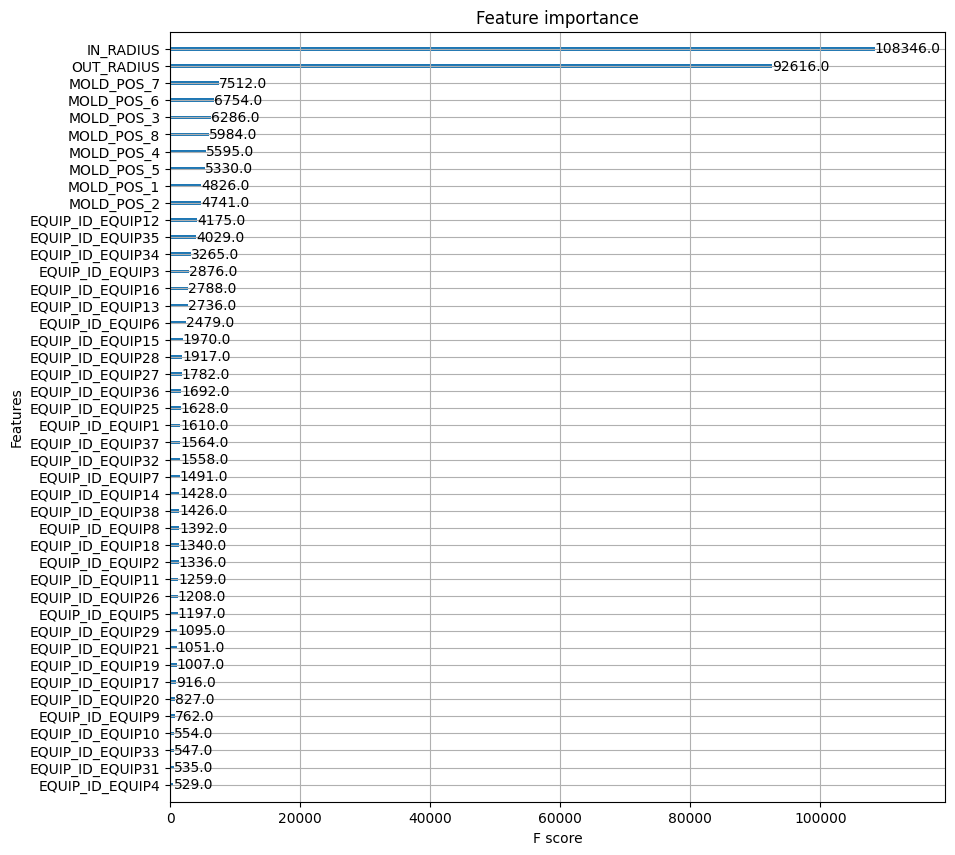

In [32]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_importance(xgb, ax = ax)

학습 데이터셋과 검증 데이터셋의 학습률을 확인

In [33]:
# !pip install --upgrade matplotlib

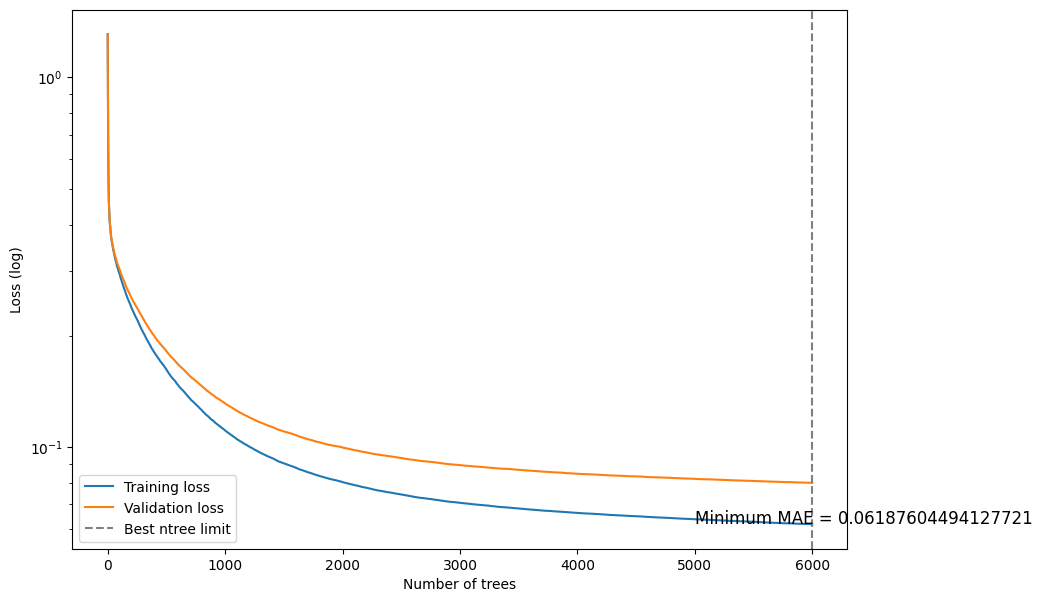

In [34]:
xgb_val = xgb.evals_result()


xgb_val = xgb.evals_result()

plt.figure(figsize=(10, 7))
plt.yscale('log')
plt.plot(xgb_val['validation_0']['mae'], label='Training loss')
plt.plot(xgb_val['validation_1']['mae'], label='Validation loss')
best_round = np.argmin(xgb_val['validation_1']['mae'])
plt.axvline(best_round, color='gray', linestyle='--', label='Best ntree limit')

# 텍스트 추가
min_mae = min(xgb_val['validation_0']['mae'])
plt.text(5000, min_mae, 'Minimum MAE = {}'.format(min_mae), fontsize=12)

plt.xlabel('Number of trees')
plt.ylabel('Loss (log)')
plt.legend()
plt.show()



=> 손실률 차이가 매우 적어 vadilation 값에 log를 취한 뒤 비교하면 학습 데이터셋의 정확도가 높게 나온다

=> best_ntree_limit 속성을 이용해 모델의 최적 분류기 개수를 확인한 결과 n_estimator가 6000일 때 best_ntree_limit도 6000이 나와 모델을 그대로 시용한다

## 목표도수를 생산하기 위한 최적 금형 조합 도출

결과 DataFrame 생성

In [35]:
# 결과를 담을 데이터프레임 생성

col_res = equip_info + cores + radius + ['RANK_INDEX', 'RANK_INDEX_1',
                                          'RANK_INDEX_2', 'PREDICTED_POWER',
                                          'PREDICTED_POWER2', 'ERROR']

df_res = pd.DataFrame(columns = col_res)
df_res = df_res.astype({'IN_RADIUS':'float',
                           'OUT_RADIUS':'float',
                           'RANK_INDEX':'float',
                           'RANK_INDEX_1':'float',
                           'RANK_INDEX_2':'float',
                           'PREDICTED_POWER':'float',
                           'PREDICTED_POWER2':'float',
                           'ERROR':'float'})

df_res.dtypes

EQUIP_ID             object
MOLD_POS             object
MOLD_IN_TOP          object
MOLD_IN_BOT          object
MOLD_OUT_TOP         object
MOLD_OUT_BOT         object
IN_RADIUS           float64
OUT_RADIUS          float64
RANK_INDEX          float64
RANK_INDEX_1        float64
RANK_INDEX_2        float64
PREDICTED_POWER     float64
PREDICTED_POWER2    float64
ERROR               float64
dtype: object

생산조건 입력

최적 공정조건을 찾기 위한 제약 조건 입력

- 설비, 금형 위치, 목표 도수, 금형 조합

'MYOPIA' 카테고리에서 가장 많이 발생한 상위 10개의 조합이 출력

In [38]:
df_sample = df_raw.groupby(['CATEGORY'] + equip_info + ['REAL_POWER', 'MOLD_IN_TOP']).count().reset_index() 
df_sample = df_sample[df_sample['POWER1'] > 10].sort_values('POWER1', ascending = False)
df_sample = df_sample[df_sample['CATEGORY'] == 'MYOPIA'] # 근시만
df_sample.reset_index(drop = True, inplace = True)
df_sample.iloc[:10]

,CATEGORY,EQUIP_ID,MOLD_POS,REAL_POWER,MOLD_IN_TOP,MFG_DT,SALE_CD,CP,AX,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
0,MYOPIA,EQUIP4,5,-1.75,CORE1 A 02. 0570,77,77,0,0,77,77,77,77,77,77,77,77,77,77,77
1,MYOPIA,EQUIP4,1,-1.50,CORE1 A 02. 0570,71,71,0,0,71,71,71,71,71,71,71,71,71,71,71
2,MYOPIA,EQUIP25,3,-1.50,CORE1 A 02. 0570,66,66,0,0,66,66,66,66,66,66,66,66,66,66,66
3,MYOPIA,EQUIP4,2,-1.50,CORE1 A 02. 0570,65,65,0,0,65,65,65,65,65,65,65,65,65,65,65
4,MYOPIA,EQUIP4,7,-2.00,CORE1 A 02. 0570,65,65,0,0,65,65,65,65,65,65,65,65,65,65,65
5,MYOPIA,EQUIP25,1,-1.75,CORE1 A 02. 0570,64,64,0,0,64,64,64,64,64,64,64,64,64,64,64
6,MYOPIA,EQUIP4,6,-2.00,CORE1 A 02. 0570,61,61,0,0,61,61,61,61,61,60,60,60,60,60,60
7,MYOPIA,EQUIP25,1,-2.50,CORE1 A 02. 0570,60,60,0,0,60,60,60,60,60,60,60,60,60,60,60
8,MYOPIA,EQUIP31,6,-3.25,CORE1 A 02. 0570,60,60,0,0,60,60,60,60,60,60,60,60,60,60,60
9,MYOPIA,EQUIP18,2,-4.00,CORE1 B 02. 0550,59,59,0,0,59,59,59,59,59,59,59,59,59,59,59


In [39]:
idx_sample = int(input('샘플데이터 중 원하는 데이터의 인덱스 입력 : '))

# 입력받은 인덱스에 해당하는 'EQUIP_ID', 'MOLD_POS', 'REAL_POWER', 'MOLD_IN_TOP'의 값을 가져오기
equipment_id = df_sample.iloc[idx_sample]['EQUIP_ID']
mold_position = df_sample.iloc[idx_sample]['MOLD_POS']
model_position = int(mold_position)
target_power = df_sample.iloc[idx_sample]['REAL_POWER']
target_power = float(target_power)

# 4개 중 'MOLD_ID_TOP'만 가져오는 이유 => 하나의 금형 조합에 포함하는 금형은 모두 동일한 금형군 이름을 가져와야 한다
core_group = df_sample.iloc[idx_sample]['MOLD_IN_TOP'][:-9] # 앞 이름만 가져오기 위해


# 선택한 조건 확인 출력
print('equipment_id : {}, mole_position : {}, target_power : {}, core_group : {}'.format(equipment_id, mold_position, target_power, core_group))

if target_power < 0 :
    category = 'MYOPIA'
elif target_power == 0:
    category = 'BEAUTY'
else:
    category = 'HYPER'

샘플데이터 중 원하는 데이터의 인덱스 입력 : 0
equipment_id : EQUIP4, mole_position : 5, target_power : -1.75, core_group : CORE1 A


In [45]:
df_sample.iloc[0]['MOLD_IN_TOP']

'CORE1 A 02. 0570'

연관규칙 알고리즘을 통한 금형조합 묶음

금형조합은 IN 몰들의 금형 2개와 OUT 몰들의 금형 2개, 총 4개의 금형으로 이루어진다

연관규칙 알고리즘은 입력 조건을 만족하면서 동일한 금형군에 속한 금형 조합의 평균 IN_RADIUS와 OUT_RADIUS를 구한다

연관규칙 적용을 위한 데이터 전처리 실행

In [40]:
# 금형 이름에서 공백을 밑줄로 변환

df_pre_assoc = df_raw.copy()

# 위에서 사용자가 입력한 core_group인 것만 가져오기
df_pre_assoc = df_pre_assoc[df_pre_assoc['MOLD_IN_TOP'].str.contains(core_group)]

for name in cores:
    df_pre_assoc[name] = df_pre_assoc[name].str.replace(' ', '_')
    
df_pre_assoc[cores][:5]

,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT
5,CORE1_A_02._0570,CORE1_A_01._P1+2,CORE1_A_05._M0650,CORE1_A_08._C-06
6,CORE1_A_02._0570,CORE1_A_01._P3+2,CORE1_A_05._M1550,CORE1_A_08._C-15
7,CORE1_A_02._0570,CORE1_A_01._P3+3,CORE1_A_05._M0500,CORE1_A_08._A-05
9,CORE1_A_02._0570,CORE1_A_01._P3+2,CORE1_A_05._M0400,CORE1_A_08._A-04
10,CORE1_A_02._0570,CORE1_A_01._P3+1,CORE1_A_05._M0925,CORE1_A_08._B-09


One-Hot-Encoding실행

In [42]:
df_pre_assoc = pd.get_dummies(df_pre_assoc, columns = cores)

print(df_pre_assoc.columns[16:], df_pre_assoc.shape)

Index(['MOLD_IN_TOP_CORE1_A_02._0570', 'MOLD_IN_BOT_CORE1_A_01._M1+0',
       'MOLD_IN_BOT_CORE1_A_01._M1+1', 'MOLD_IN_BOT_CORE1_A_01._M1+2',
       'MOLD_IN_BOT_CORE1_A_01._M1+3', 'MOLD_IN_BOT_CORE1_A_01._M1-1',
       'MOLD_IN_BOT_CORE1_A_01._M2+0', 'MOLD_IN_BOT_CORE1_A_01._M2+1',
       'MOLD_IN_BOT_CORE1_A_01._M2+3', 'MOLD_IN_BOT_CORE1_A_01._M2-1',
       ...
       'MOLD_OUT_BOT_CORE6_A_07._C-16', 'MOLD_OUT_BOT_CORE6_A_07._D-00',
       'MOLD_OUT_BOT_CORE6_A_07._D-01', 'MOLD_OUT_BOT_CORE6_A_07._D-02',
       'MOLD_OUT_BOT_CORE6_A_07._D-03', 'MOLD_OUT_BOT_CORE6_A_07._D-04',
       'MOLD_OUT_BOT_CORE6_A_07._D-05', 'MOLD_OUT_BOT_CORE6_A_07._D-06',
       'MOLD_OUT_BOT_CORE6_A_07._D-07', 'MOLD_OUT_BOT_CORE6_A_07._D-08'],
      dtype='object', length=362) (56352, 378)


연관규칙 알고리즘을 위한 데이터셋을 추출

In [43]:
# 전처리 데이터에서 'CATEGORY', 'EQUIP_ID', 'MOLD_POS', 'REAL_POWER가' 입력조건과 일치하는 데이터만 추출

df_assoc = df_pre_assoc.copy()
assoc_pos = mold_position

df_assoc = df_assoc[(df_assoc['CATEGORY'] == category) &
                    (df_assoc['EQUIP_ID'] == equipment_id) &
                    (df_assoc['MOLD_POS'] == mold_position) &
                    (df_assoc['REAL_POWER'] == target_power)]

생산조건과 일치하는 이력이 없는 경우의 데이터셋 설정

In [44]:
df_assoc.shape

(77, 378)

In [45]:
df_assoc.head()

,EQUIP_ID,MFG_DT,SALE_CD,MOLD_POS,REAL_POWER,CP,AX,IN_RADIUS,OUT_RADIUS,POWER,...,MOLD_OUT_BOT_CORE6_A_07._C-16,MOLD_OUT_BOT_CORE6_A_07._D-00,MOLD_OUT_BOT_CORE6_A_07._D-01,MOLD_OUT_BOT_CORE6_A_07._D-02,MOLD_OUT_BOT_CORE6_A_07._D-03,MOLD_OUT_BOT_CORE6_A_07._D-04,MOLD_OUT_BOT_CORE6_A_07._D-05,MOLD_OUT_BOT_CORE6_A_07._D-06,MOLD_OUT_BOT_CORE6_A_07._D-07,MOLD_OUT_BOT_CORE6_A_07._D-08
2954,EQUIP4,2019-12-16,SALES 9,5,-1.75,NaN,NaN,-6.4898,6.8222,-1.75,...,False,False,False,False,False,False,False,False,False,False
2955,EQUIP4,2019-12-06,SALES 9,5,-1.75,NaN,NaN,-6.4935,6.5860,-1.75,...,False,False,False,False,False,False,False,False,False,False
5410,EQUIP4,2019-07-03,SALES 22,5,-1.75,NaN,NaN,-6.4852,6.8345,-1.75,...,False,False,False,False,False,False,False,False,False,False
8161,EQUIP4,2018-06-15,SALES 9,5,-1.75,NaN,NaN,6.8245,-6.4830,-1.75,...,False,False,False,False,False,False,False,False,False,False
9275,EQUIP4,2018-02-12,SALES 9,5,-1.75,NaN,NaN,6.8536,-6.4768,-1.75,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# 생산이력이 없으면 입력조건과 'CATEGORY'가 일치하는 모든 데이터를 대상으로 연관규칙을 실행

if df_assoc.shape[0] == 0:
    print('No history, Searching within All')
    df_assoc = df_pre_assoc.copy()
    df_assoc = df_assoc[(df_assoc['CATEGORY'] == category) & (df_assoc['REAL_POWER'] == target_power)]
    assoc_pos = 0
    
df_assoc.shape

(77, 378)

One-Hot-Encoding 데이터셋 분리

In [47]:
df_ = df_assoc.copy()
df_ex = df_.iloc[:, 16:].replace({1 : True, 0 : False})

print(df_ex.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2954 to 172496
Data columns (total 362 columns):
 #    Column                          Dtype
---   ------                          -----
 0    MOLD_IN_TOP_CORE1_A_02._0570    bool 
 1    MOLD_IN_BOT_CORE1_A_01._M1+0    bool 
 2    MOLD_IN_BOT_CORE1_A_01._M1+1    bool 
 3    MOLD_IN_BOT_CORE1_A_01._M1+2    bool 
 4    MOLD_IN_BOT_CORE1_A_01._M1+3    bool 
 5    MOLD_IN_BOT_CORE1_A_01._M1-1    bool 
 6    MOLD_IN_BOT_CORE1_A_01._M2+0    bool 
 7    MOLD_IN_BOT_CORE1_A_01._M2+1    bool 
 8    MOLD_IN_BOT_CORE1_A_01._M2+3    bool 
 9    MOLD_IN_BOT_CORE1_A_01._M2-1    bool 
 10   MOLD_IN_BOT_CORE1_A_01._OK+0    bool 
 11   MOLD_IN_BOT_CORE1_A_01._OK+1    bool 
 12   MOLD_IN_BOT_CORE1_A_01._OK+2    bool 
 13   MOLD_IN_BOT_CORE1_A_01._OK+3    bool 
 14   MOLD_IN_BOT_CORE1_A_01._OK+4    bool 
 15   MOLD_IN_BOT_CORE1_A_01._OK-1    bool 
 16   MOLD_IN_BOT_CORE1_A_01._P1+0    bool 
 17   MOLD_IN_BOT_CORE1_A_01._P1+1    bool 
 18   MOLD_IN_

연관규칙 알고리즘 실행

In [48]:
df_ex.head()

,MOLD_IN_TOP_CORE1_A_02._0570,MOLD_IN_BOT_CORE1_A_01._M1+0,MOLD_IN_BOT_CORE1_A_01._M1+1,MOLD_IN_BOT_CORE1_A_01._M1+2,MOLD_IN_BOT_CORE1_A_01._M1+3,MOLD_IN_BOT_CORE1_A_01._M1-1,MOLD_IN_BOT_CORE1_A_01._M2+0,MOLD_IN_BOT_CORE1_A_01._M2+1,MOLD_IN_BOT_CORE1_A_01._M2+3,MOLD_IN_BOT_CORE1_A_01._M2-1,...,MOLD_OUT_BOT_CORE6_A_07._C-16,MOLD_OUT_BOT_CORE6_A_07._D-00,MOLD_OUT_BOT_CORE6_A_07._D-01,MOLD_OUT_BOT_CORE6_A_07._D-02,MOLD_OUT_BOT_CORE6_A_07._D-03,MOLD_OUT_BOT_CORE6_A_07._D-04,MOLD_OUT_BOT_CORE6_A_07._D-05,MOLD_OUT_BOT_CORE6_A_07._D-06,MOLD_OUT_BOT_CORE6_A_07._D-07,MOLD_OUT_BOT_CORE6_A_07._D-08
2954,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2955,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5410,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8161,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9275,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# 연관규칙 알고리즘

assoc_res = fpgrowth(df_ex, min_support = 0.005, use_colnames = True)

# 연관규칙 도출 과정 중 ['sets'] == 4인 경우
# 즉, 4개의 금형이 조합을 이루는 유효한 값을 추려냄
assoc_res['sets'] = assoc_res['itemsets'].apply(lambda x : len(x))
print(assoc_res.sort_values('sets', ascending = False))

assoc_res = assoc_res[assoc_res['sets'] == 4]
assoc_res

      support                                           itemsets  sets
176  0.012987  (MOLD_IN_BOT_CORE1_A_01._P2+1, MOLD_IN_TOP_COR...     4
107  0.012987  (MOLD_IN_BOT_CORE1_A_01._P3+2, MOLD_IN_TOP_COR...     4
151  0.012987  (MOLD_IN_BOT_CORE1_A_01._P3+3, MOLD_OUT_TOP_CO...     4
69   0.012987  (MOLD_IN_BOT_CORE1_A_01._P2+2, MOLD_OUT_TOP_CO...     4
33   0.376623  (MOLD_IN_BOT_CORE1_A_01._P1+2, MOLD_IN_TOP_COR...     4
..        ...                                                ...   ...
19   0.038961                     (MOLD_IN_BOT_CORE1_A_01._P3+3)     1
20   0.038961                    (MOLD_OUT_BOT_CORE1_A_8A._D-02)     1
22   0.012987                     (MOLD_IN_BOT_CORE1_A_01._P2+1)     1
1    0.480519                     (MOLD_IN_BOT_CORE1_A_01._P1+2)     1
0    1.000000                     (MOLD_IN_TOP_CORE1_A_02._0570)     1

[177 rows x 3 columns]


,support,itemsets,sets
33,0.376623,"(MOLD_IN_BOT_CORE1_A_01._P1+2, MOLD_IN_TOP_COR...",4
49,0.077922,"(MOLD_OUT_BOT_CORE1_A_8A._A-03, MOLD_OUT_TOP_C...",4
52,0.090909,"(MOLD_IN_BOT_CORE1_A_01._P1+2, MOLD_OUT_TOP_CO...",4
62,0.051948,"(MOLD_OUT_TOP_CORE1_A_05._M0250, MOLD_OUT_BOT_...",4
69,0.012987,"(MOLD_IN_BOT_CORE1_A_01._P2+2, MOLD_OUT_TOP_CO...",4
78,0.025974,"(MOLD_OUT_TOP_CORE1_A_05._M0300, MOLD_OUT_BOT_...",4
82,0.012987,"(MOLD_OUT_TOP_CORE1_A_05._M0350, MOLD_IN_BOT_C...",4
94,0.038961,"(MOLD_IN_BOT_CORE1_A_01._P2+2, MOLD_IN_TOP_COR...",4
103,0.025974,"(MOLD_OUT_BOT_CORE1_A_8A._A-03, MOLD_IN_BOT_CO...",4
107,0.012987,"(MOLD_IN_BOT_CORE1_A_01._P3+2, MOLD_IN_TOP_COR...",4


연관규칙 결과 테이블 만들기

In [66]:
# One-Hot-Encoding에서 각 금형값 앞에 컬럼명을 추가했던 것을 제거

temp_df = pd.DataFrame(columns = cores + ['SUPPORT'])
temp_lst = [list(x) for x in assoc_res['itemsets']] # 위 결과의 금형 조합을 의미

for i, dset in enumerate(temp_lst):
    for name in dset:
        if 'MOLD_IN_TOP_' in name:
            p1 = compile('MOLD_IN_TOP_{}') # 정규 표현식 패턴을 컴파일하여 정규 표현식 객체를 반환
            mold_in_top = p1.parse(name)[0] # 컴파일된 정규 표현식 객체 p1을 사용하여 문자열 name에서 패턴에 일치하는 부분을 추출
        elif 'MOLD_IN_BOT_' in name:
            p2 = compile('MOLD_IN_BOT_{}')
            mold_in_bot = p2.parse(name)[0]
        elif 'MOLD_OUT_TOP_' in name:
            p3 = compile("MOLD_OUT_TOP_{}")
            mold_out_top = p3.parse(name)[0]
        elif 'MOLD_OUT_BOT_' in name:
            p4 = compile("MOLD_OUT_BOT_{}")
            mold_out_bot = p4.parse(name)[0]            
        score = assoc_res['support'].iloc[i]
    
    temp_df.loc[i] = [mold_in_top, mold_in_bot, mold_out_top, mold_out_bot, score]
    temp_df = temp_df.sort_values('SUPPORT', ascending = False)

assoc_res = temp_df

# 금형이름에서 밑줄을 빈칸으로
for name in cores:
    assoc_res[name] = assoc_res[name].str.replace('_', ' ')

assoc_res

,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,SUPPORT
0,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,0.376623
2,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,0.090909
1,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,0.077922
14,CORE1 A 02. 0570,CORE1 A 01. P1+3,CORE1 A 05. M0300,CORE1 A 05. A-03,0.064935
3,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0250,CORE1 A 05. C-02,0.051948
13,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0350,CORE1 A 08. C-03,0.051948
7,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0275,CORE1 A 05. D-02,0.038961
11,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0325,CORE1 A 05. B-03,0.038961
8,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,0.025974
16,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0275,CORE1 A 8A. D-02,0.025974


비교군 데이터셋 생성

- 원천 데이터(df_raw) 중 'EQUIP_ID', 'MOLD_POS'가 일치하는 비교군 데이터 추출

In [67]:
df_temp_raw = df_raw.copy()

if assoc_pos != 0:
    df_temp_raw = df_temp_raw[(df_temp_raw['EQUIP_ID'] == equipment_id) & (df_temp_raw['MOLD_POS'] == assoc_pos)]

중복 결과 데이터 삭제 1

- 비교군 데이터에서 연관규칙 결과와 일치하는 데이터를 모두 찾고 중복되는 값을 제거

In [68]:
df_temp_res = pd.DataFrame(columns = df_temp_raw.columns)
df_temp_res = df_temp_res.astype({'REAL_POWER':'float',
                                   'OUT_RADIUS':'float',
                                   'IN_RADIUS':'float', 
                                   'POWER':'float',
                                   'POWER1':'float',
                                   'POWER2':'float',
                                   'POWER3':'float',
                                   'POWER4':'float',
                                   'POWER5':'float'})

In [70]:
df_temp_res

,EQUIP_ID,MFG_DT,SALE_CD,MOLD_POS,REAL_POWER,CP,AX,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5,CATEGORY


In [75]:
for i in range(assoc_res.shape[0]):
    # 연관규칙 결과와 일치하는 결과를 모두 찾기
    mold_in_top = assoc_res.loc[i]['MOLD_IN_TOP']
    mold_in_bot = assoc_res.loc[i]['MOLD_IN_BOT']    
    mold_out_top = assoc_res.loc[i]['MOLD_OUT_TOP']    
    mold_out_bot = assoc_res.loc[i]['MOLD_OUT_BOT']    
    
    df_temp = df_temp_raw[(df_temp_raw['MOLD_IN_TOP'] == mold_in_top) &
                          (df_temp_raw['MOLD_IN_BOT'] == mold_in_bot) &
                          (df_temp_raw['MOLD_OUT_TOP'] == mold_out_top) &
                          (df_temp_raw['MOLD_OUT_BOT'] == mold_out_bot)]
    df_temp_res = pd.concat([df_temp_res, df_temp])
    
# 중복 데이터 제거
df_temp_res = df_temp_res.drop(['MFG_DT', 'SALE_CD', 'REAL_POWER', 'POWER', 'CATEGORY'], axis = 1)

df_temp_res = df_temp_res[equip_info + cores + radius + powers]
df_temp_res = df_temp_res.drop_duplicates(cores + radius)
df_temp_res.reset_index(inplace = True, drop = True)

In [76]:
df_temp_res

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.4898,6.8222,-1.75,-1.75,-1.87,-1.87,-1.87
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.4935,6.5860,-1.75,-1.87,-1.87,-1.87,-2.00
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.4955,6.8256,-1.75,-1.75,-1.87,-1.87,-1.87
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.5160,7.0036,-1.75,-1.75,-1.75,-1.87,-1.87
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.4788,6.5872,-1.87,-1.87,-1.87,-1.87,-1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0275,CORE1 A 8A. D-02,-6.4853,6.8039,-1.50,-1.62,-1.62,-1.62,-1.62
93,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,-6.4784,6.5390,-1.37,-1.37,-1.50,-1.50,-1.50
94,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,-6.4765,6.8245,-1.75,-1.75,-1.75,-1.75,-1.75
95,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+1,CORE1 A 05. M0350,CORE1 A 08. C-03,-6.4908,6.8504,-1.87,-1.87,-1.87,-1.87,-1.87


In [79]:
df_temp_res[equip_info + cores + powers]

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.75,-1.75,-1.87,-1.87,-1.87
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.75,-1.87,-1.87,-1.87,-2.00
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.75,-1.75,-1.87,-1.87,-1.87
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.75,-1.75,-1.75,-1.87,-1.87
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.87,-1.87,-1.87,-1.87,-1.87
...,...,...,...,...,...,...,...,...,...,...,...
92,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0275,CORE1 A 8A. D-02,-1.50,-1.62,-1.62,-1.62,-1.62
93,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,-1.37,-1.37,-1.50,-1.50,-1.50
94,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,-1.75,-1.75,-1.75,-1.75,-1.75
95,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+1,CORE1 A 05. M0350,CORE1 A 08. C-03,-1.87,-1.87,-1.87,-1.87,-1.87


P컬럼 생성

- 'POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5'열을 pivot 하고 'POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5' 값을 통합한 컬럼의 이 름을 P로 지정

In [77]:
tmp = df_temp_res.melt(id_vars = equip_info + cores,
                      value_vars = powers,
                      value_name = 'P').astype({'P' : 'float'})

tmp

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,variable,P
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,POWER1,-1.75
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,POWER1,-1.75
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,POWER1,-1.75
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,POWER1,-1.75
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,POWER1,-1.87
...,...,...,...,...,...,...,...,...
480,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0275,CORE1 A 8A. D-02,POWER5,-1.62
481,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,POWER5,-1.50
482,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0275,CORE1 A 8A. D-02,POWER5,-1.75
483,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+1,CORE1 A 05. M0350,CORE1 A 08. C-03,POWER5,-1.87


P값이 중복되는 데이터 삭제

- 'EQUIP_ID', 'MOLD_POS', core group이 같은 데이터를 묶고 나머지 값(P외)의 중위수 찾기

In [79]:
# 'variable'열 삭제
tmp = tmp.drop('variable', axis = 1)
tmp = tmp.groupby(equip_info + cores, as_index = False, sort = False).median()

In [80]:
tmp

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,P
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-1.870
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-1.750
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-1.750
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0250,CORE1 A 05. C-02,-1.620
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 05. A-03,-1.750
5,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0300,CORE1 A 05. A-03,-1.870
6,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0350,CORE1 A 08. C-03,-1.870
7,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0275,CORE1 A 05. D-02,-1.750
8,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-1.750
9,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-2.000


중복 결과데이터 삭제2

- 'EQUIP_ID', 'MOLD_POS', cores가 일치하는 데이터끼리 묶고 나머지 값의 중위수 찾기

In [81]:
df_temp_res = df_temp_res.groupby(equip_info + cores,
                                 as_index = False,
                                 sort = False).median()

df_res = pd.concat([df_res, df_temp_res])

df_res

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,RANK_INDEX,RANK_INDEX_1,RANK_INDEX_2,PREDICTED_POWER,PREDICTED_POWER2,ERROR,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.48730,6.83460,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.810,-1.870,-1.870,-1.870
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.47580,6.81980,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.750,-1.750
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.49295,6.82020,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.685,-1.620,-1.620
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0250,CORE1 A 05. C-02,6.76115,-6.48655,NaN,NaN,NaN,NaN,NaN,NaN,-1.500,-1.620,-1.620,-1.620,-1.560
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 05. A-03,6.80590,-6.48000,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.620,-1.620
5,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0300,CORE1 A 05. A-03,6.83275,-6.48705,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.810,-1.810,-1.870,-1.935
6,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0350,CORE1 A 08. C-03,-6.49270,6.85730,NaN,NaN,NaN,NaN,NaN,NaN,-1.875,-1.935,-1.870,-1.870,-1.935
7,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0275,CORE1 A 05. D-02,6.79910,-6.48440,NaN,NaN,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.620,-1.750
8,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.47485,6.80285,NaN,NaN,NaN,NaN,NaN,NaN,-1.685,-1.685,-1.685,-1.750,-1.750
9,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.47845,6.85100,NaN,NaN,NaN,NaN,NaN,NaN,-2.000,-2.000,-2.060,-1.935,-1.935


'RANK_INDEX_1'컬럼값 추가

- df_res의 'RANK_INDEX_1'열에 P와 target_power의 오차의 절대값을 추가

In [83]:
df_res['RANK_INDEX_1'] = np.abs(tmp['P'].values - target_power)

df_res

,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,RANK_INDEX,RANK_INDEX_1,RANK_INDEX_2,PREDICTED_POWER,PREDICTED_POWER2,ERROR,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.48730,6.83460,NaN,0.120,NaN,NaN,NaN,NaN,-1.750,-1.810,-1.870,-1.870,-1.870
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.47580,6.81980,NaN,0.000,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.750,-1.750
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.49295,6.82020,NaN,0.000,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.685,-1.620,-1.620
3,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0250,CORE1 A 05. C-02,6.76115,-6.48655,NaN,0.130,NaN,NaN,NaN,NaN,-1.500,-1.620,-1.620,-1.620,-1.560
4,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 05. A-03,6.80590,-6.48000,NaN,0.000,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.620,-1.620
5,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0300,CORE1 A 05. A-03,6.83275,-6.48705,NaN,0.120,NaN,NaN,NaN,NaN,-1.750,-1.810,-1.810,-1.870,-1.935
6,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+3,CORE1 A 05. M0350,CORE1 A 08. C-03,-6.49270,6.85730,NaN,0.120,NaN,NaN,NaN,NaN,-1.875,-1.935,-1.870,-1.870,-1.935
7,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0275,CORE1 A 05. D-02,6.79910,-6.48440,NaN,0.000,NaN,NaN,NaN,NaN,-1.750,-1.750,-1.750,-1.620,-1.750
8,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,-6.47485,6.80285,NaN,0.000,NaN,NaN,NaN,NaN,-1.685,-1.685,-1.685,-1.750,-1.750
9,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,-6.47845,6.85100,NaN,0.250,NaN,NaN,NaN,NaN,-2.000,-2.000,-2.060,-1.935,-1.935


연관규칙 결과가 존재하지 않을 때

- 생산이력이 전무한 경우에는 XGBoost모델이 해당 예시를 학습하지 못했으므로 프로세스를 종료

In [84]:
if df_res.shape[0] == 0:
    print('입력 조건과 일치하는 생산이력이 존재하지 않습니다')

## 연관규칙 결과와 XGBoost예측 결과에서 최적 조건 찾기

예측도수 변환에 필요한 변수 및 함수 정의

- power_values'는 0.25 또는 0.5 단위로 나눠진 도수의 기준표

- 생산된 렌즈는 5차례에 걸쳐 도수를 측정하는데 그 측정값이 'POWER1' ~ 'POWER5'열의 값이며 power_values의 값 중에서 측정도수의 평균과 오차가 가장 작은 값이 최종 도수로 결정

In [85]:
# POWER 할당 함수
power_values = np.array([-0.25, -0.5, -0.75, 
                         -1.0, -1.25, -1.5,
                         -1.75, -2.0, -2.25,
                         -2.5, -2.75, -3.0,
                         -3.25, -3.5, -3.75,
                         -4.0, -4.25, -4.5,
                         -4.75, -5.0, -5.25,
                         -5.5, -5.75, -6.0,
                         -6.5, -7.0, -7.5,
                         -8.0, -8.5, -9.0,
                         -9.5, -10.0])

# 주어진 값과 가장 가까운 power_values 배열의 요소를 반환
def power_allocate(value):
    return power_values[np.argmin(abs(power_values - value))]

# 주어진 값 또는 배열에 대해 power_allocate 함수를 벡터화하여 적용
def vectorize(value):
    return np.vectorize(power_allocate)(value)

XGBoost를 이용한 도수 예측

- 연관규칙 결과 데이터 df_result에서 'IN_RADIUS'와 'OUT_RADIUS'의 값을 부호를 없앤 뒤, 'IN_RADIUS', 'OUT_RADIUS', 'EQUIP_ID', 'MODL_POS를' XGBoost 회귀 모델에 넣고 'REAL_POWER를' 예측

In [89]:
# 생신조건(설비, 금형위치)에 따른 'REAL_POWER'예측
df_res[radius] = abs(df_res[radius])

X = df_res[radius + equip_info]
X.loc[:, 'EQUIP_ID'] = equipment_id
X.loc[:, 'MOLD_POS'] = mold_position

X, encoder = one_hot_encoding(X, encoder)
X

ENCODER transform


,IN_RADIUS,OUT_RADIUS,EQUIP_ID_EQUIP1,EQUIP_ID_EQUIP10,EQUIP_ID_EQUIP11,EQUIP_ID_EQUIP12,EQUIP_ID_EQUIP13,EQUIP_ID_EQUIP14,EQUIP_ID_EQUIP15,EQUIP_ID_EQUIP16,...,EQUIP_ID_EQUIP8,EQUIP_ID_EQUIP9,MOLD_POS_1,MOLD_POS_2,MOLD_POS_3,MOLD_POS_4,MOLD_POS_5,MOLD_POS_6,MOLD_POS_7,MOLD_POS_8
0,6.48730,6.83460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6.47580,6.81980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.49295,6.82020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6.76115,6.48655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6.80590,6.48000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6.83275,6.48705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,6.49270,6.85730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,6.79910,6.48440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,6.47485,6.80285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,6.47845,6.85100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [90]:
# XGBoost 모델을 이용한 'REAL_POWER'예측
df_res['PREDICTED_POWER'] = xgb.predict(X)
df_res['PREDICTED_POWER2'] = df_res['PREDICTED_POWER'].apply(vectorize)

XGBoost 예측결과 내 우선순위 도출

- 예측 도수(PREDICTED_POWER)와 목표 도수(target_power)의 오차를 'RANK_INDEX_2'에 저장

- 입력 조건(equipment_id, mold_postion)과 일치하는 데이터가 있는 경우 최종 우선쉰위(RANK_INDEX)는 RANK_INDEX_1과 RANK_INDEX_2의 합이 되고, 일치하는 입력조건이 없는 경우 RANK_INDEX_2를 최종 우선순위로 사용

- 최종 우선순위가 높은 순으로 최대 5개의 최적조건울 도출

In [91]:
df_res['RANK_INDEX_2'] = np.abs(df_res['PREDICTED_POWER'].values - target_power)

if all(df_res['EQUIP_ID'] == equipment_id) & all(df_res['MOLD_POS'] == mold_position):
    df_res['RANK_INDEX'] = df_res['RANK_INDEX_1'] + df_res['RANK_INDEX_2']
    
else:
    df_res['RANK_INDEX'] = df_res['RANK_INDEX_2']

df_res = df_res.sort_values(by = 'RANK_INDEX').iloc[:5]

df_res['EQUIP_ID'] = equipment_id
df_res['MOLD_POS'] = mold_position

결과출력

- 사용자가 지정한 목표도수(target_power)와 옟ㄱ한 결정도수(PREDECTED_POWER2)의 오차를 ERROR에 담은 후 결과테이블을 출력

In [92]:
df_res['ERROR'] = df_res['PREDICTED_POWER2'] - target_power

In [93]:
print('최종 금형조합 추천 결과')
showing_cols = equip_info + cores + radius + ['PREDICTED_POWER', 'PREDICTED_POWER2', 'ERROR']
df_res[showing_cols]

최종 금형조합 추천 결과


,EQUIP_ID,MOLD_POS,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,PREDICTED_POWER,PREDICTED_POWER2,ERROR
8,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,6.47485,6.80285,-1.745843,-1.75,0.00
1,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,6.47580,6.81980,-1.722250,-1.75,0.00
16,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0275,CORE1 A 8A. D-02,6.48595,6.81390,-1.820669,-1.75,0.00
0,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0325,CORE1 A 8A. B-03,6.48730,6.83460,-1.775085,-1.75,0.00
2,EQUIP4,5,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0300,CORE1 A 8A. A-03,6.49295,6.82020,-1.960889,-2.00,-0.25


사용자 입력 조건을 출력해 결과에 문제가 없는지 확인

In [129]:
def s_replace(value):
    return ' '.join(value.split(' ')[2:])

df_fin_res = df_res[['MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT', 'PREDICTED_POWER2', 'ERROR']]
df_fin_res.rename(columns={'PREDICTED_POWER2': '예측 도수'}, inplace=True)
df_fin_res[cores] = df_fin_res[cores].applymap(s_replace)

print('equipment_id : ', equipment_id, 'mold_position : ', mold_position,
      'target_power : ', target_power, 'core_group : ', core_group)
df_fin_res

equipment_id :  EQUIP4 mold_position :  5 target_power :  -1.75 core_group :  CORE1 A


,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,예측 도수,ERROR
8,02. 0570,01. P3+2,05. M0300,8A. A-03,-1.75,0.00
1,02. 0570,01. P2+2,05. M0300,8A. A-03,-1.75,0.00
16,02. 0570,01. P3+3,05. M0275,8A. D-02,-1.75,0.00
0,02. 0570,01. P1+2,05. M0325,8A. B-03,-1.75,0.00
2,02. 0570,01. P1+2,05. M0300,8A. A-03,-2.00,-0.25


=> 사용자는 입력했던 값과 결과와 비교하여 목표도수를 생산하기에 가장 적합한 금형 조합을 선택할 수 있다